##imports!!!

In [3]:

# code and ideas in this document are adopted from https://neurodsp-tools.github.io/neurodsp/
# Thank you to all those who came before me, for your contributions.
# -Kenton Guarian

# general imports
from neurodsp.utils import create_times

# imports for simulating periodic component
from neurodsp.sim import sim_bursty_oscillation
from neurodsp.sim import sim_variable_oscillation


# for simulating aperiodic component.
from neurodsp.sim import sim_powerlaw

# for plotting
from neurodsp.plts import plot_time_series
import matplotlib.pyplot as plt

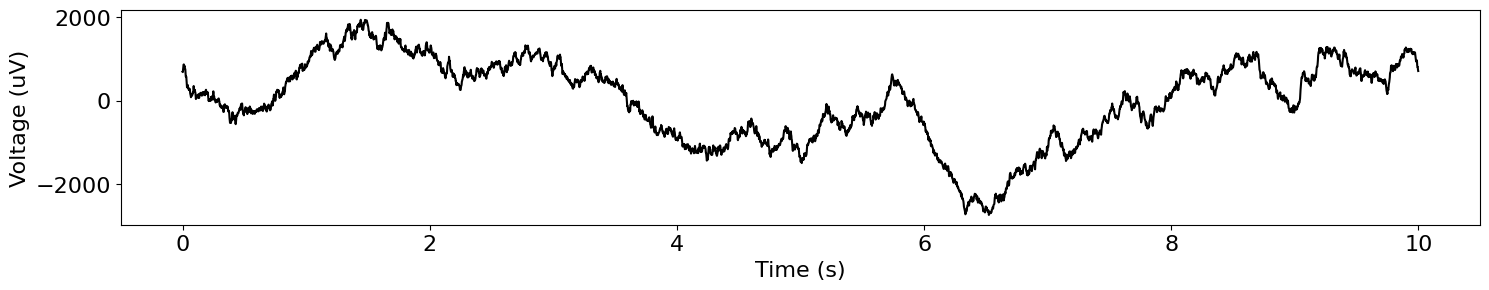

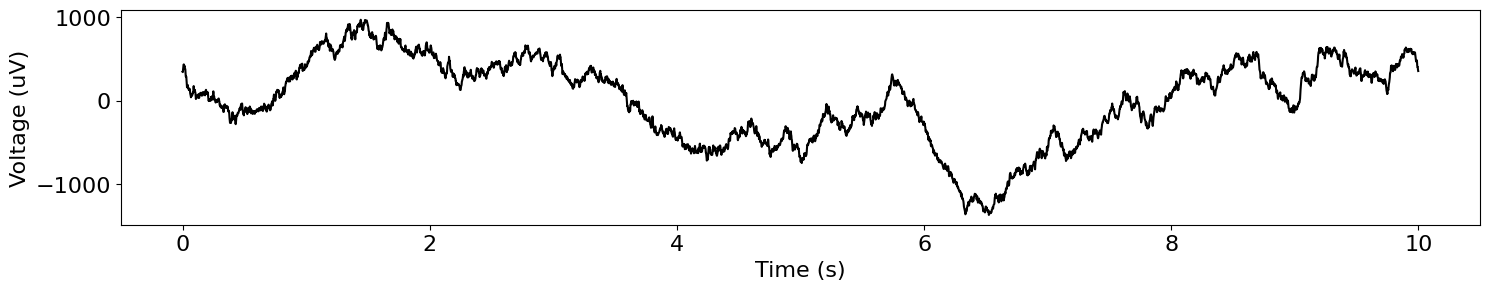

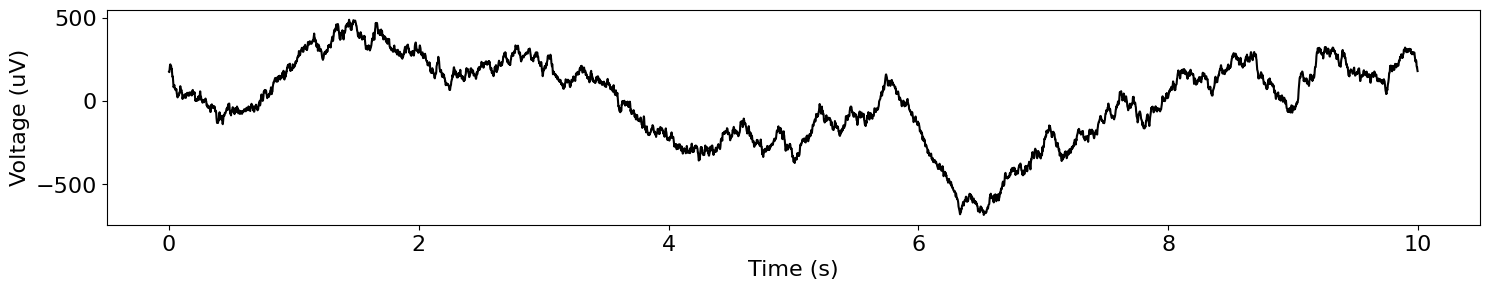

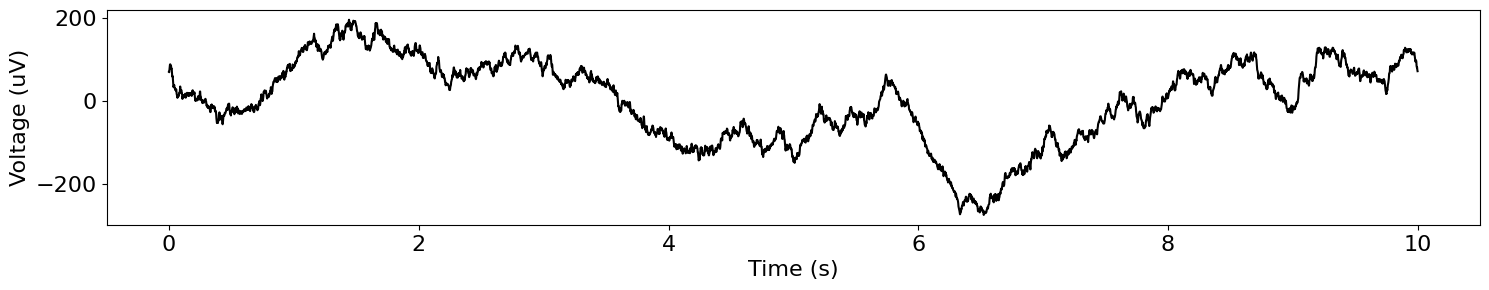

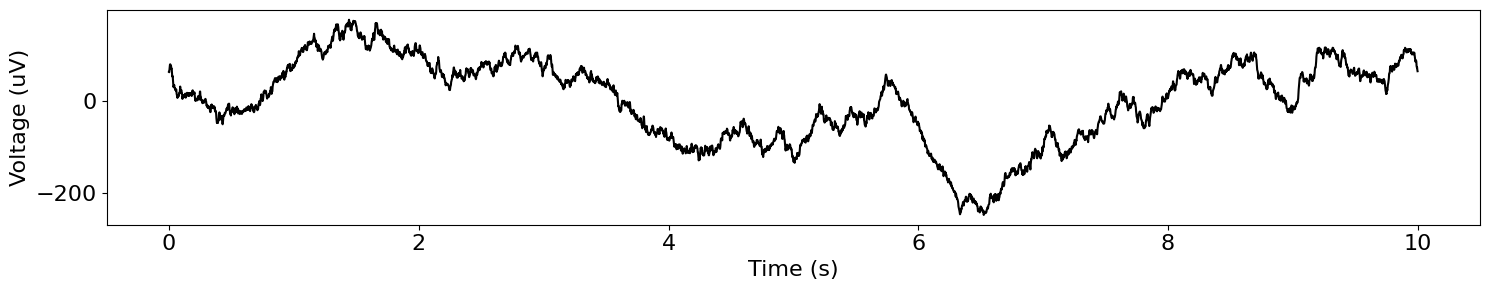

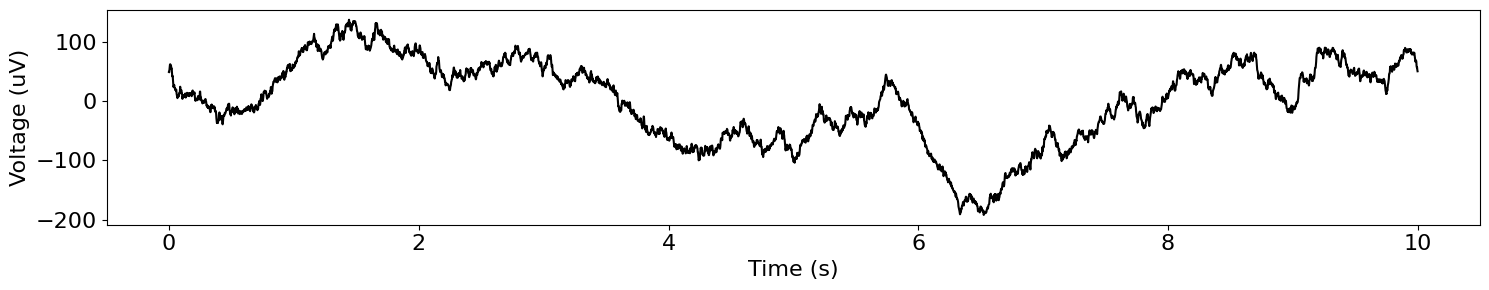

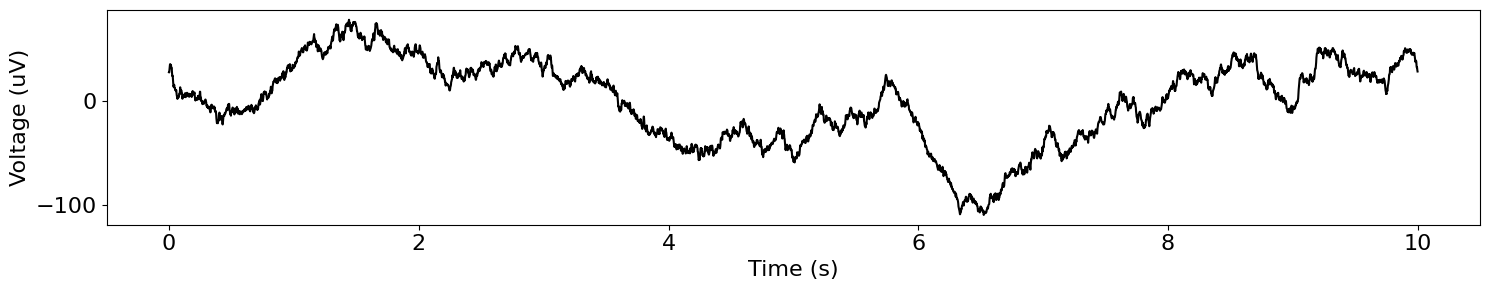

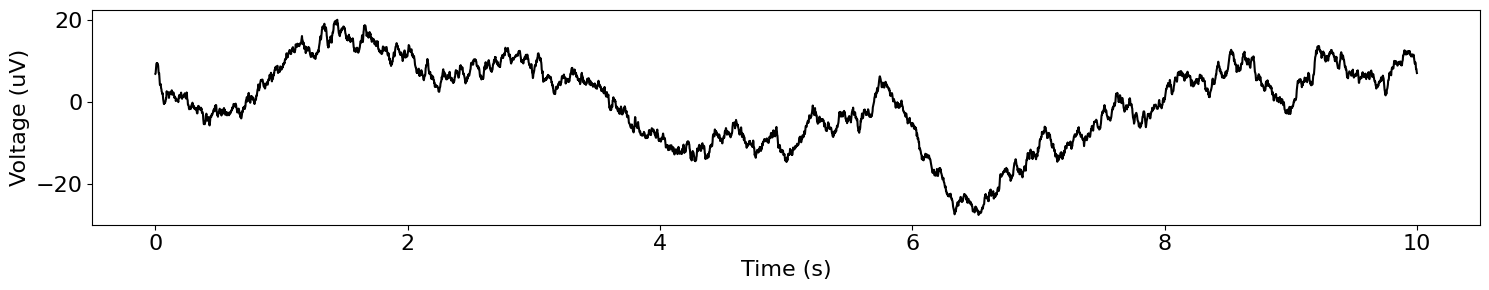

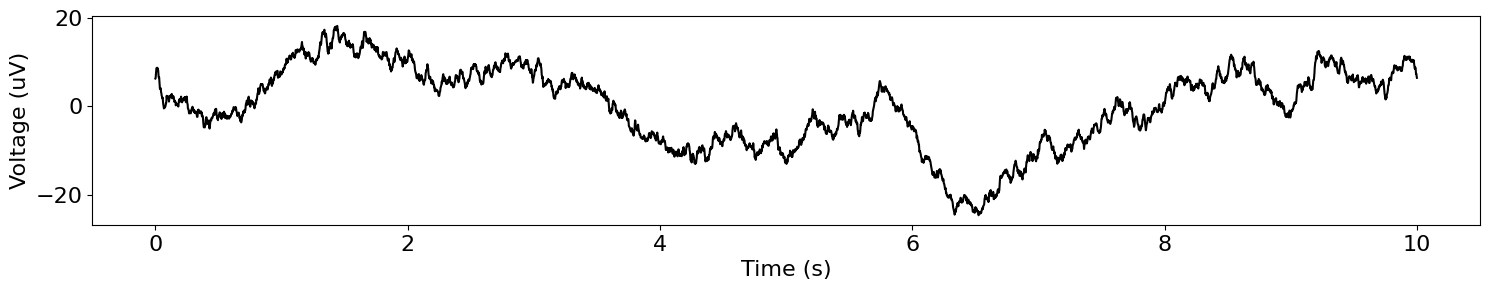

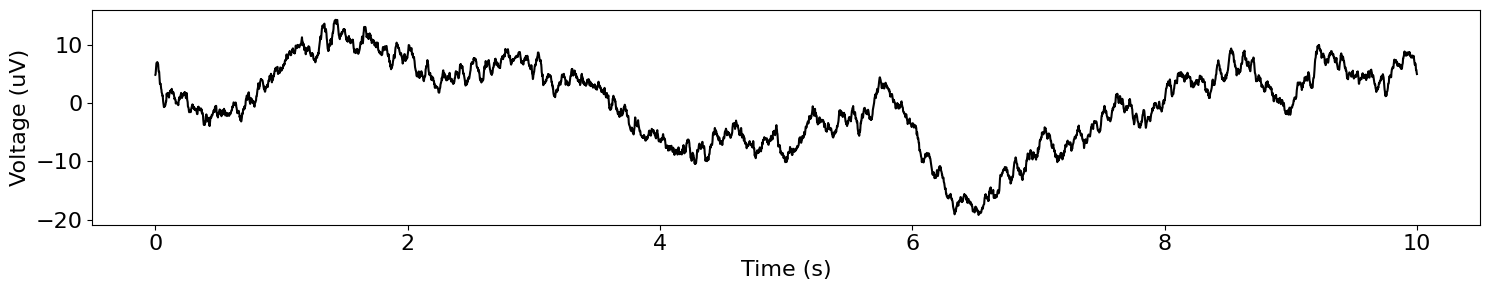

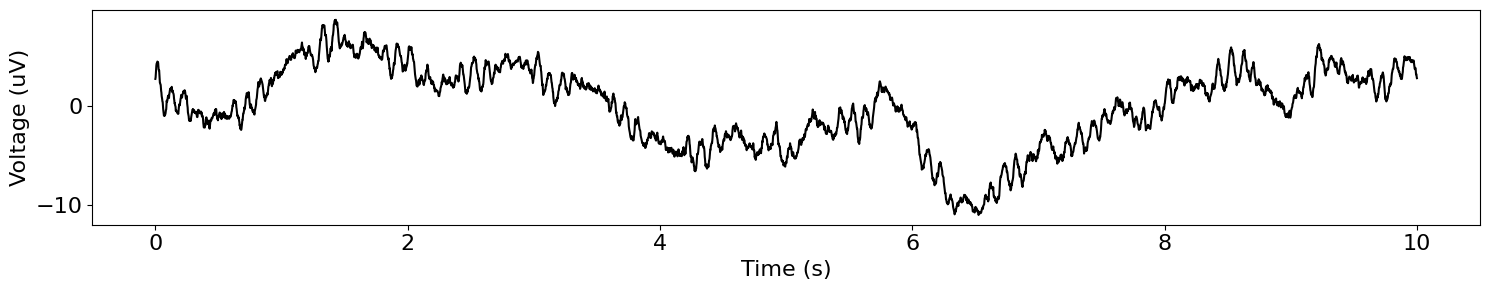

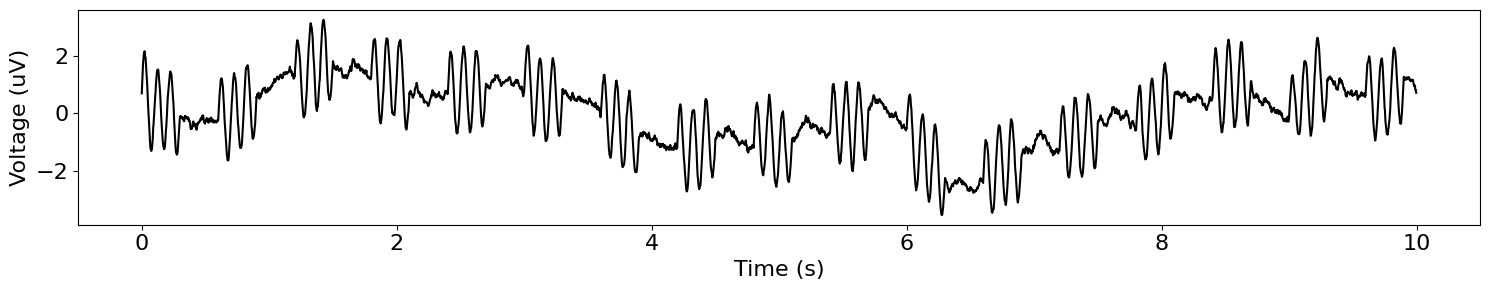

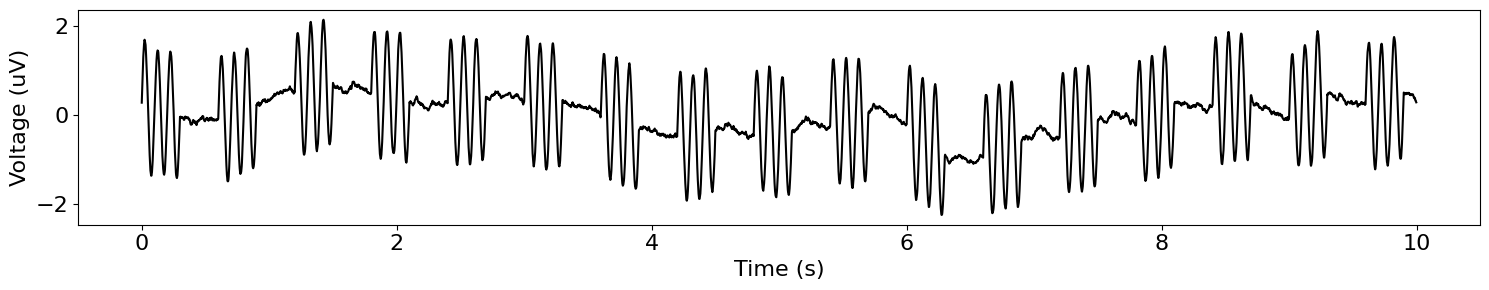

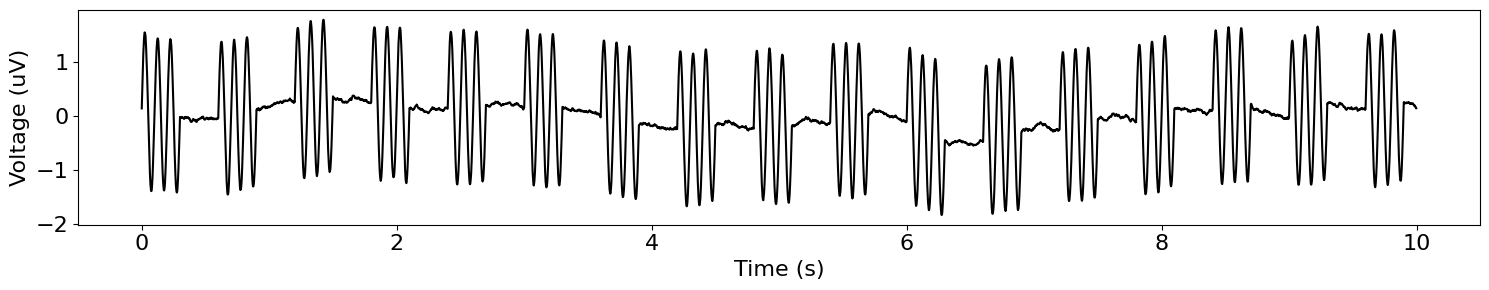

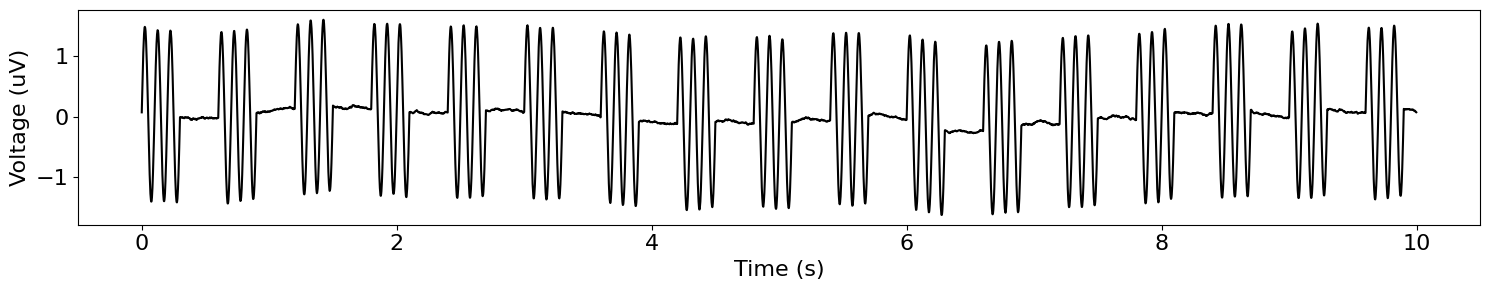

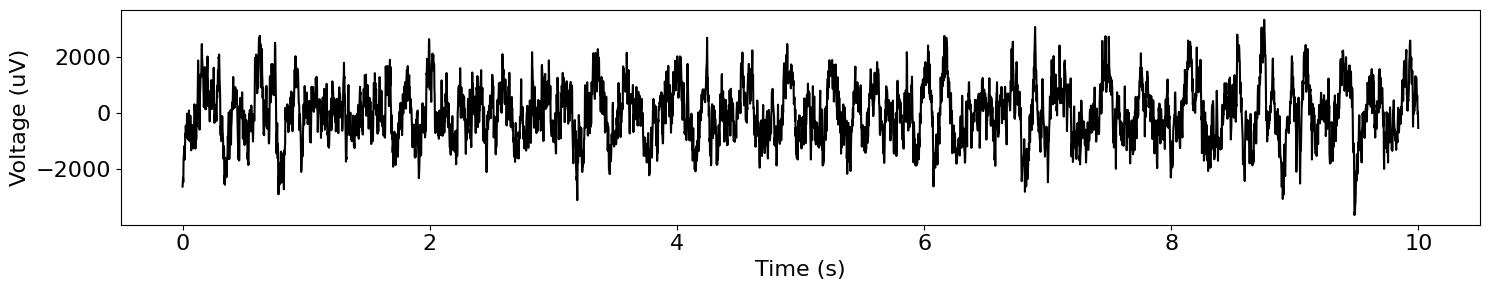

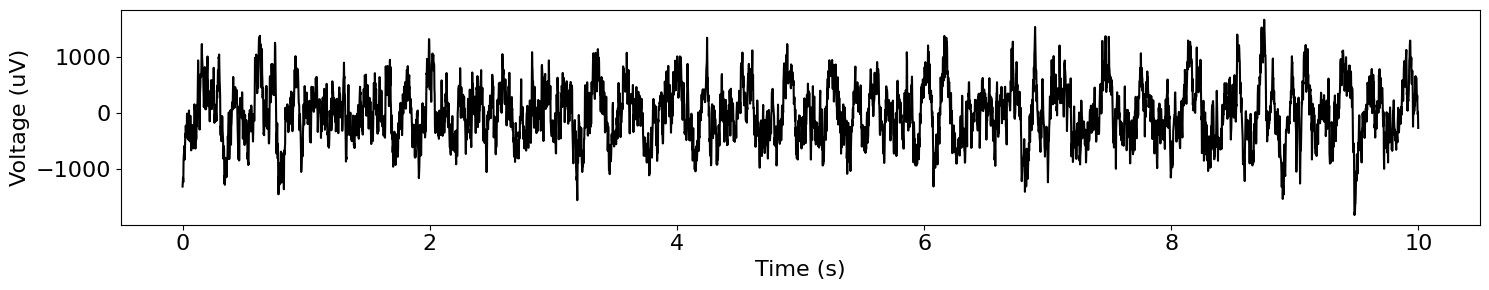

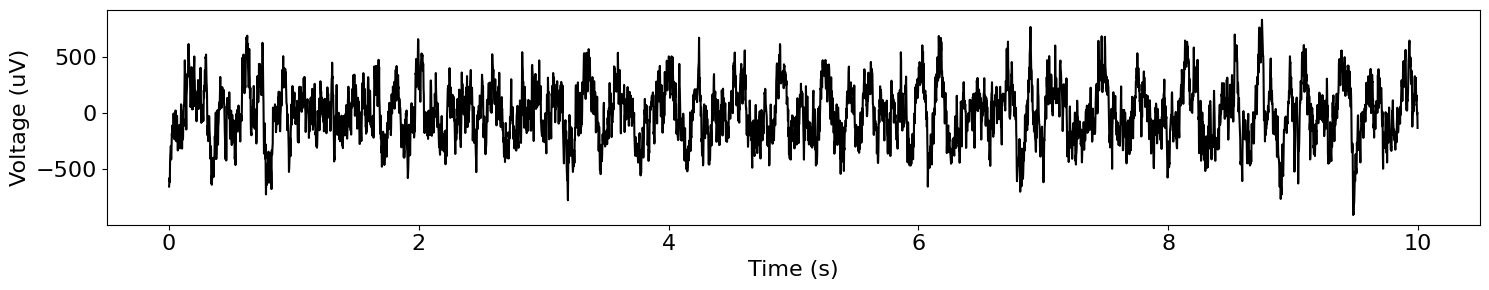

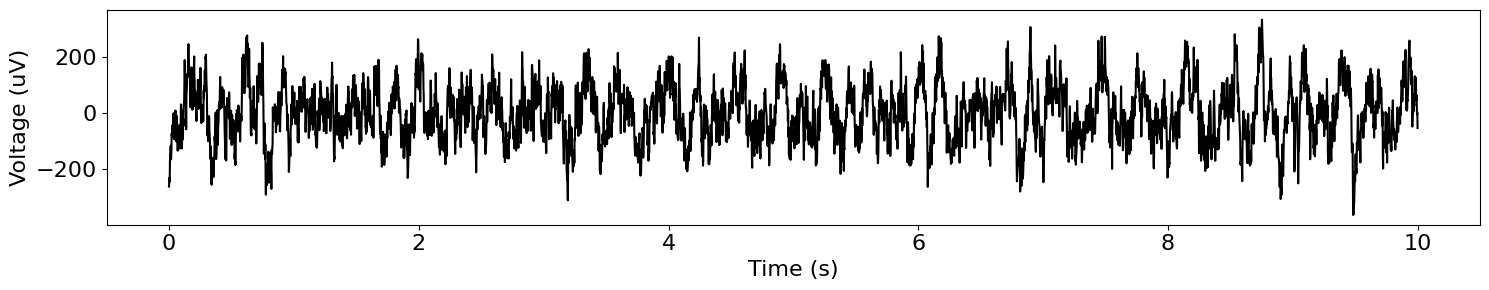

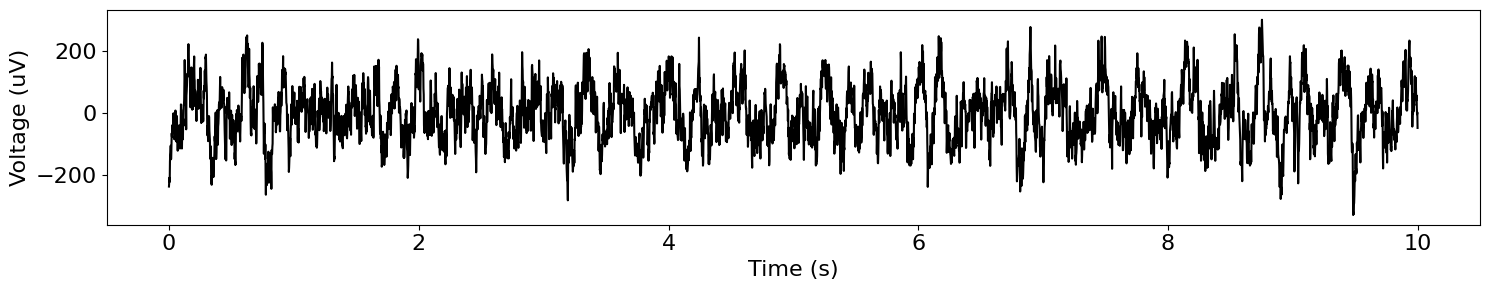

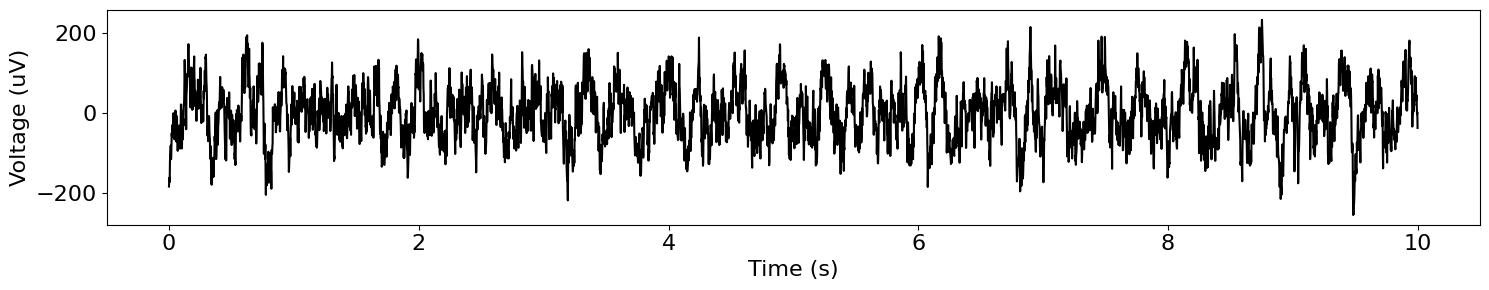

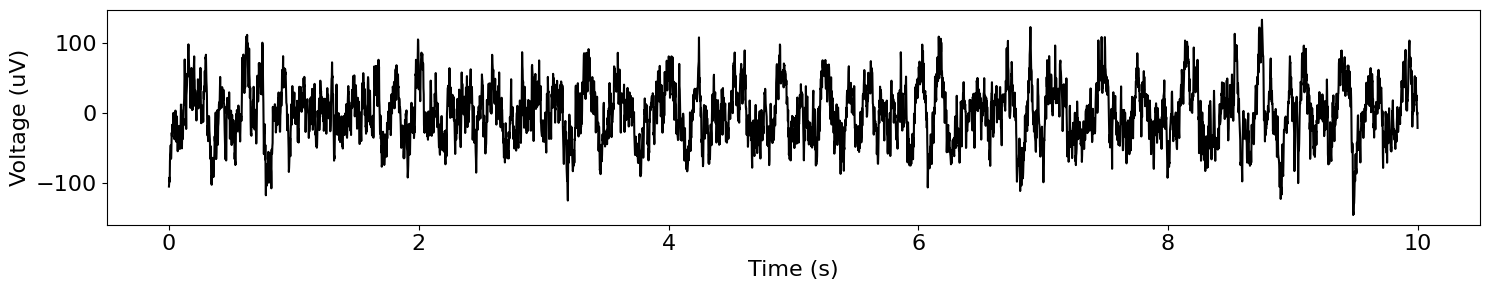

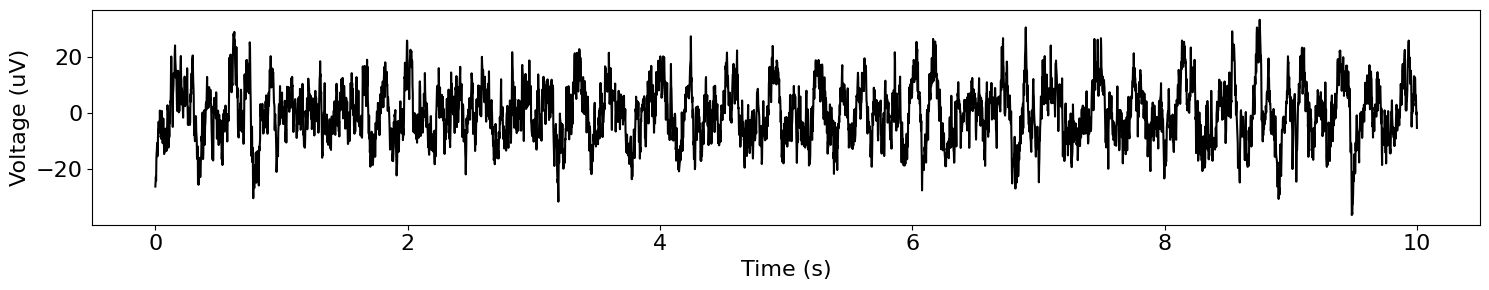

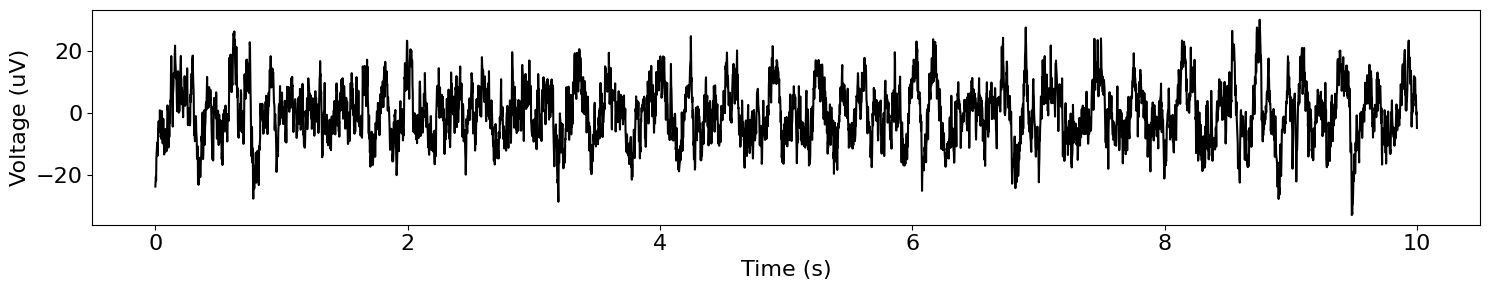

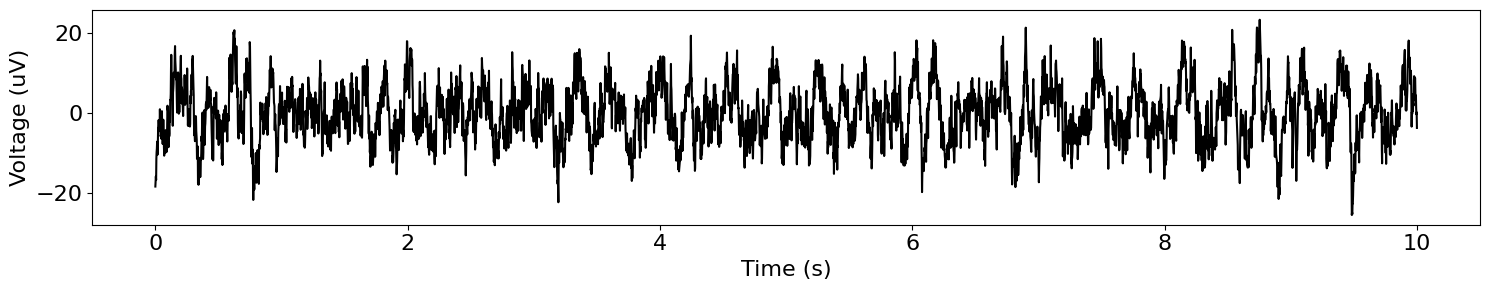

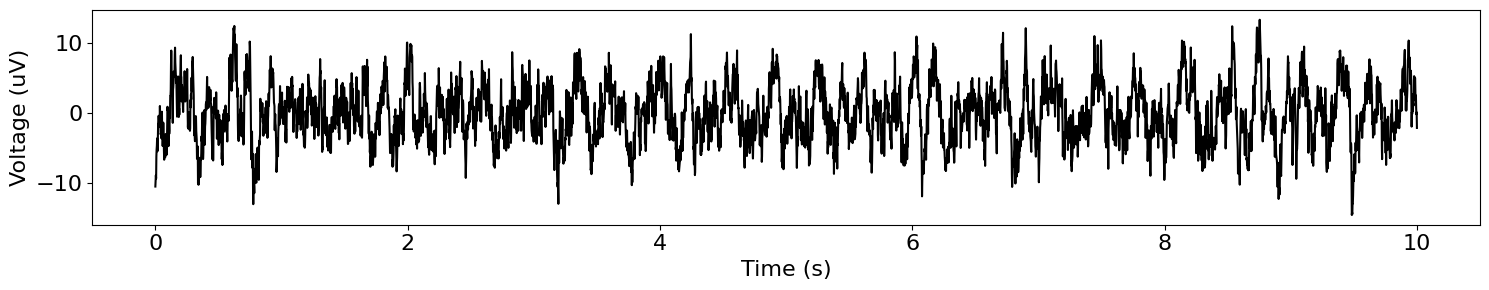

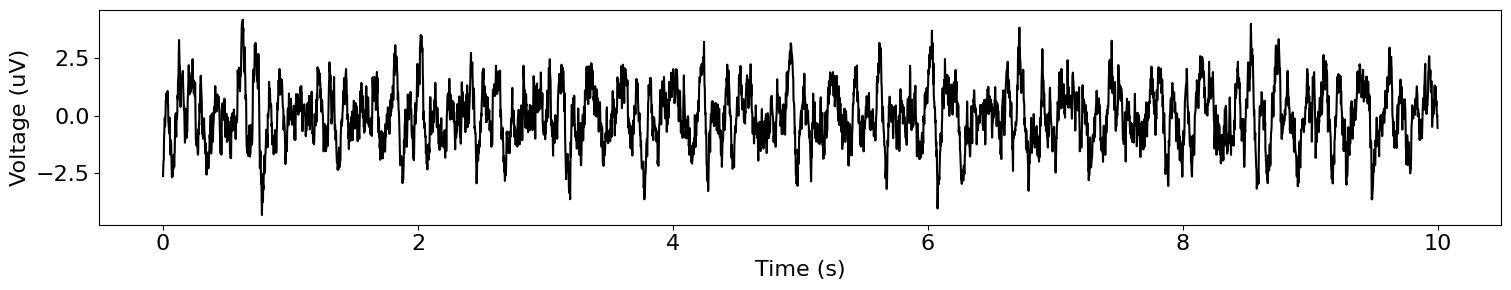

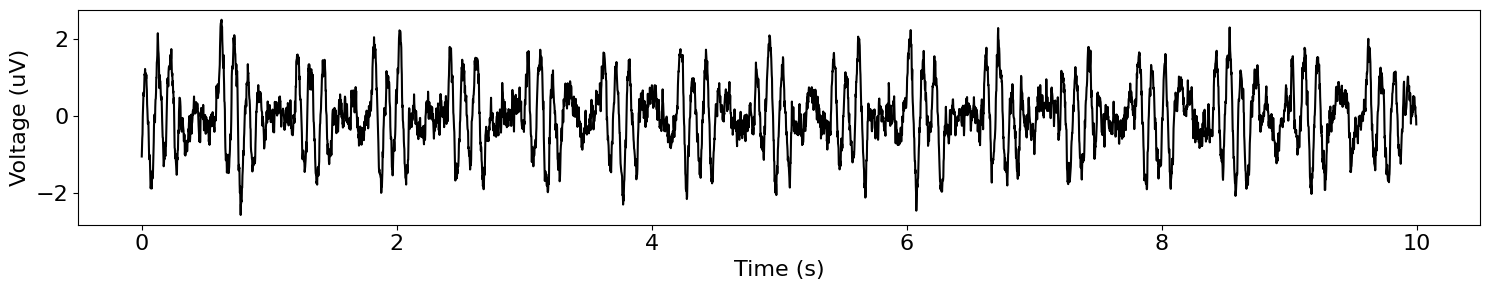

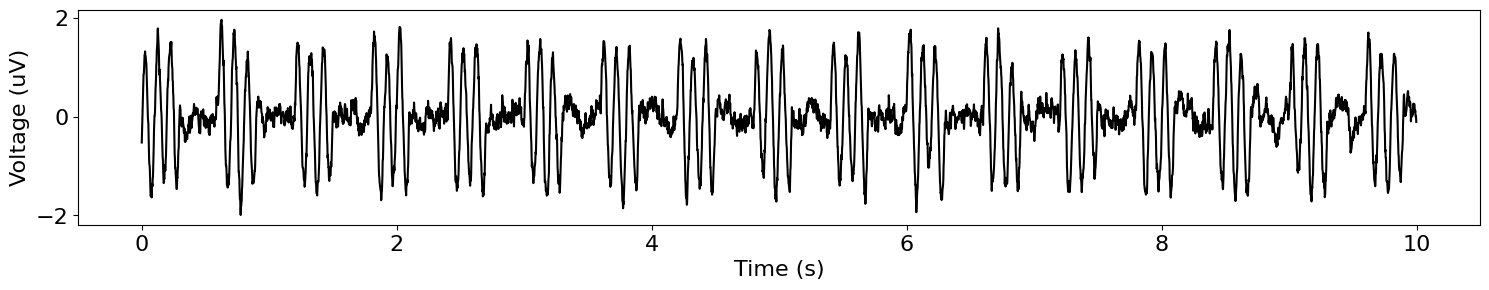

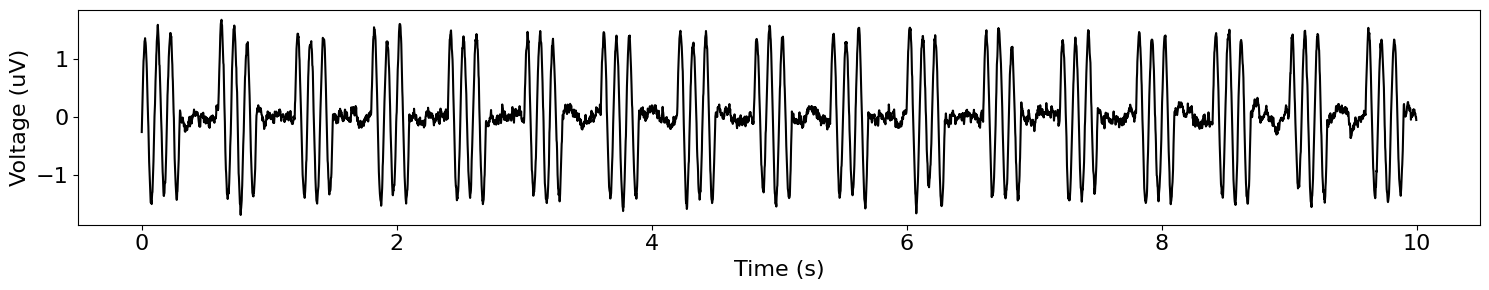

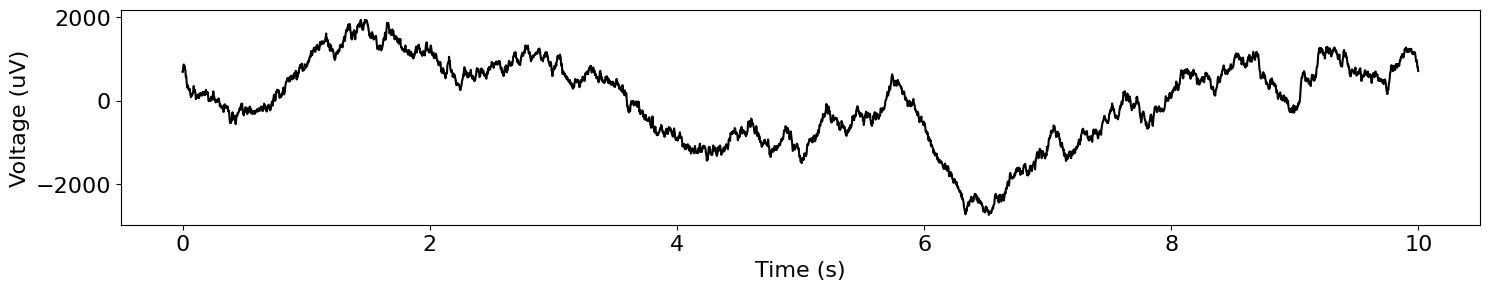

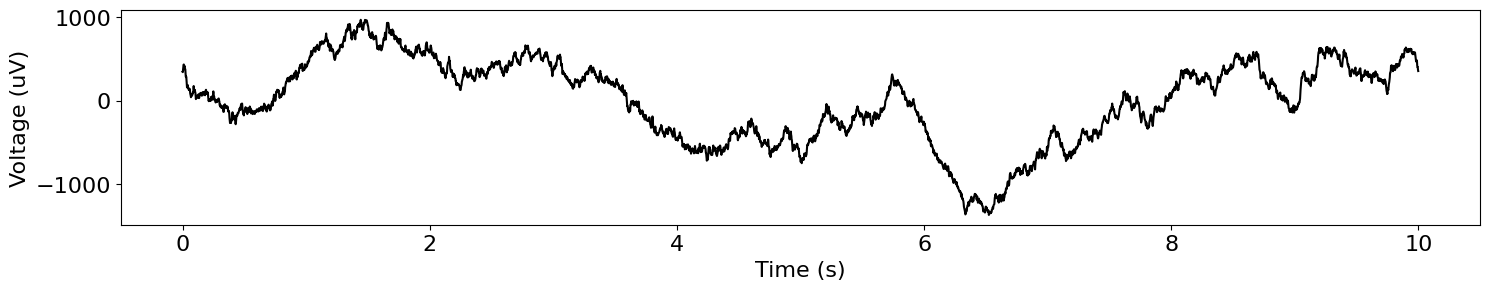

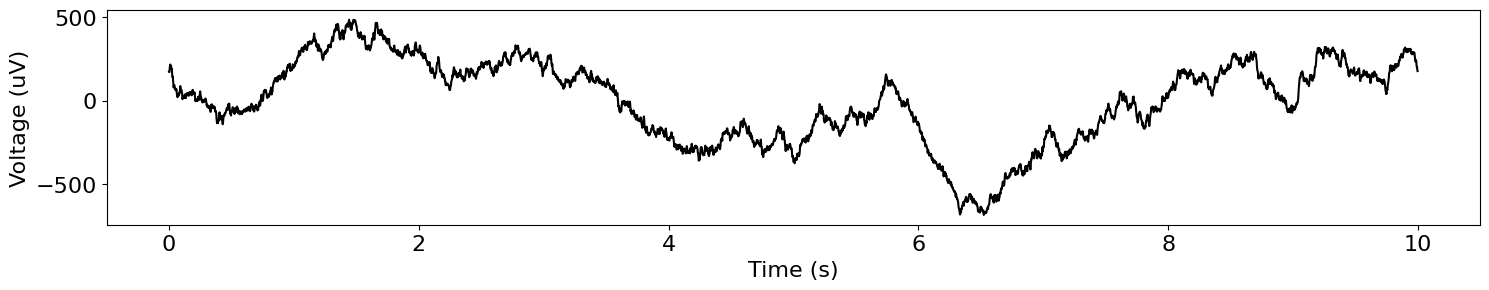

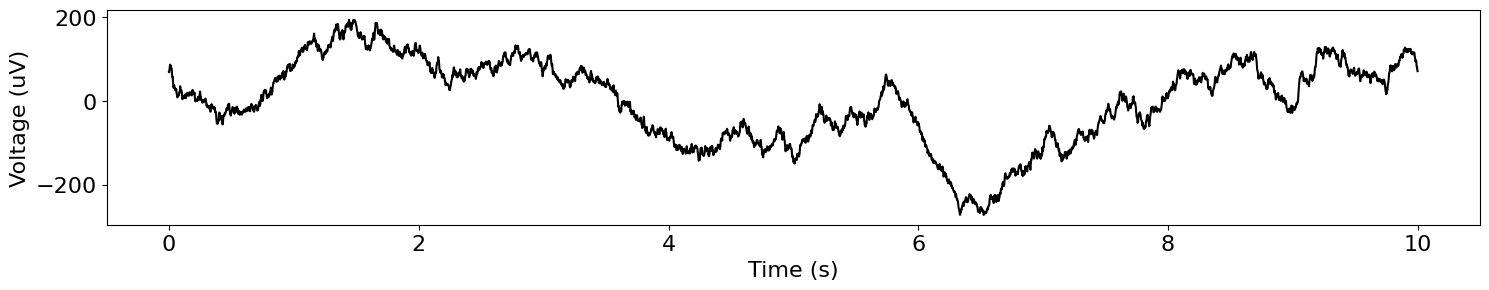

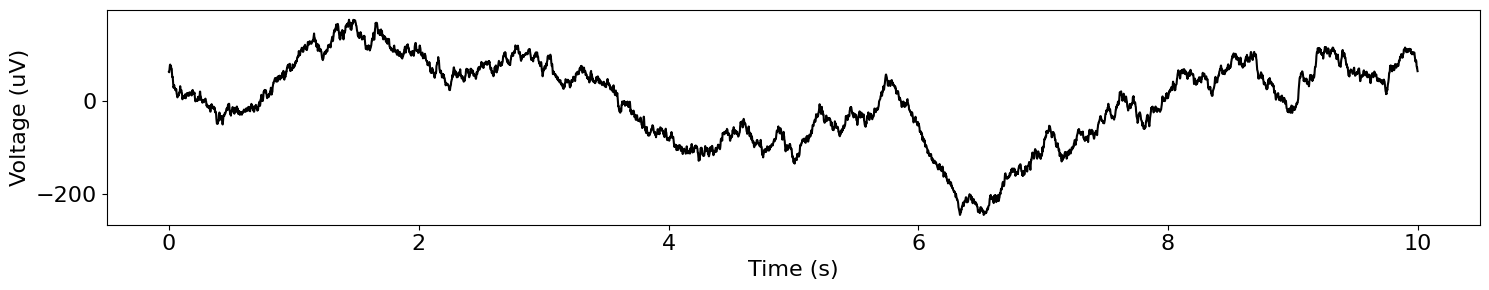

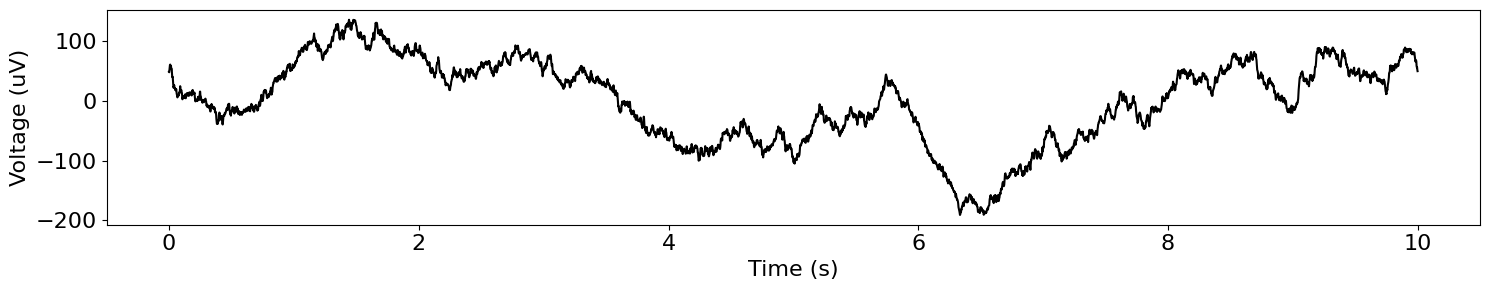

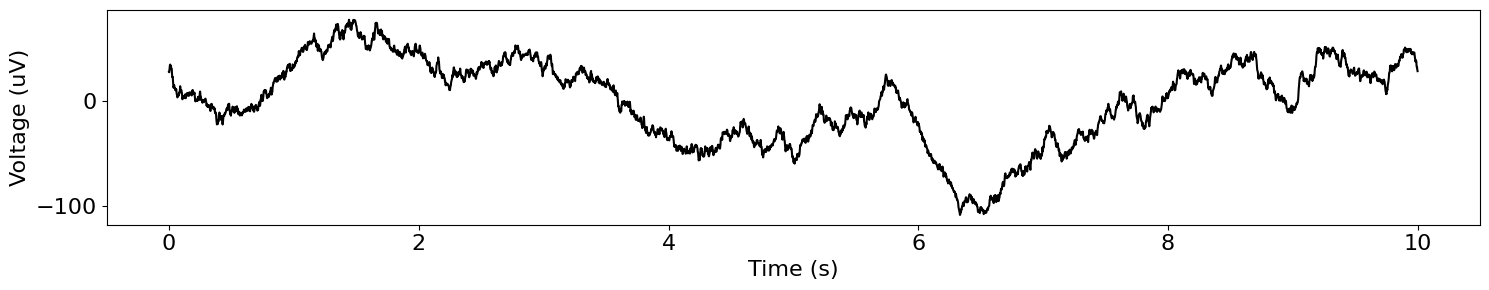

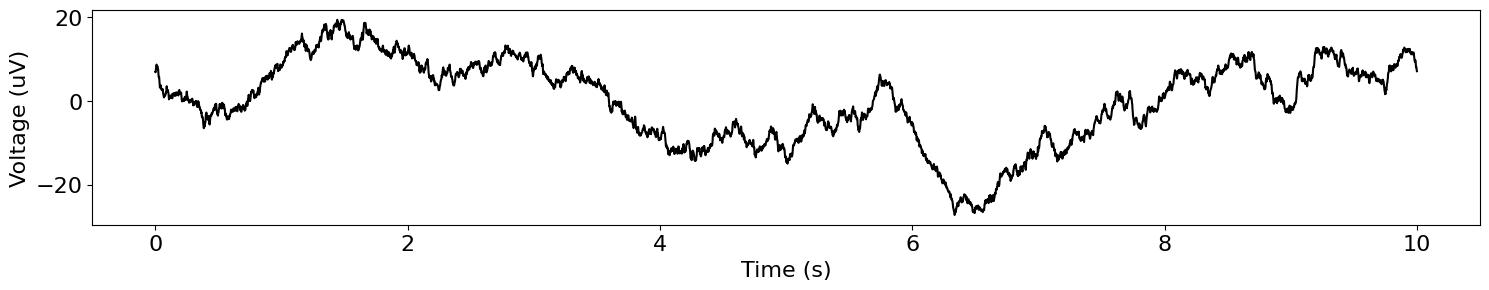

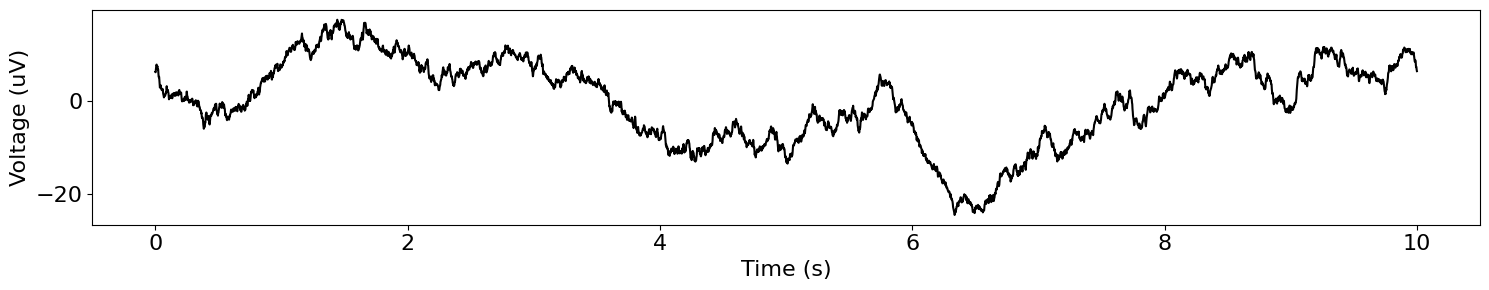

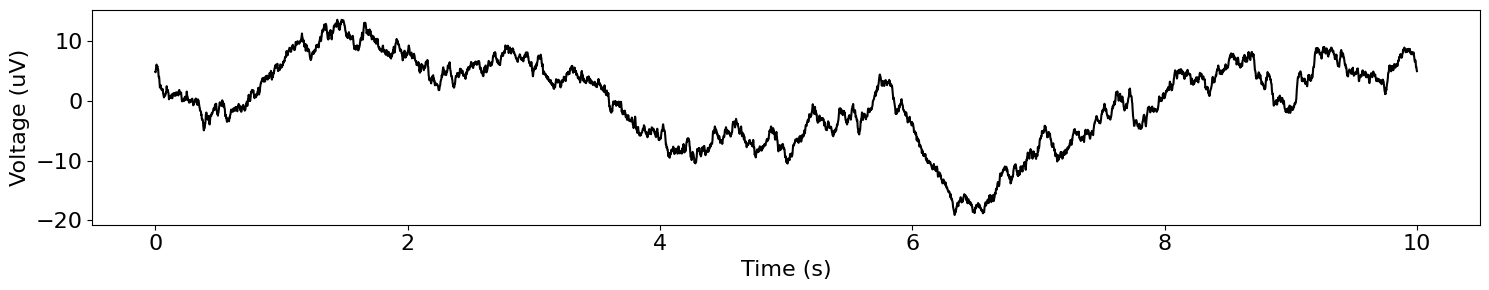

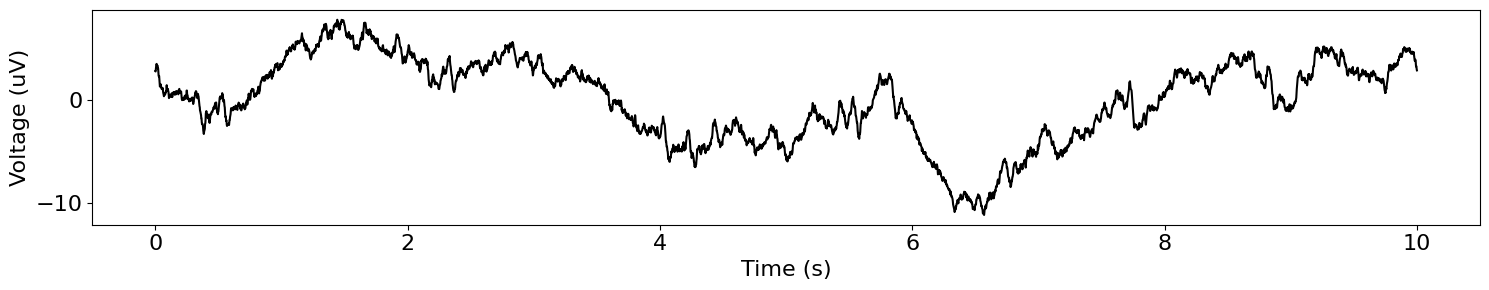

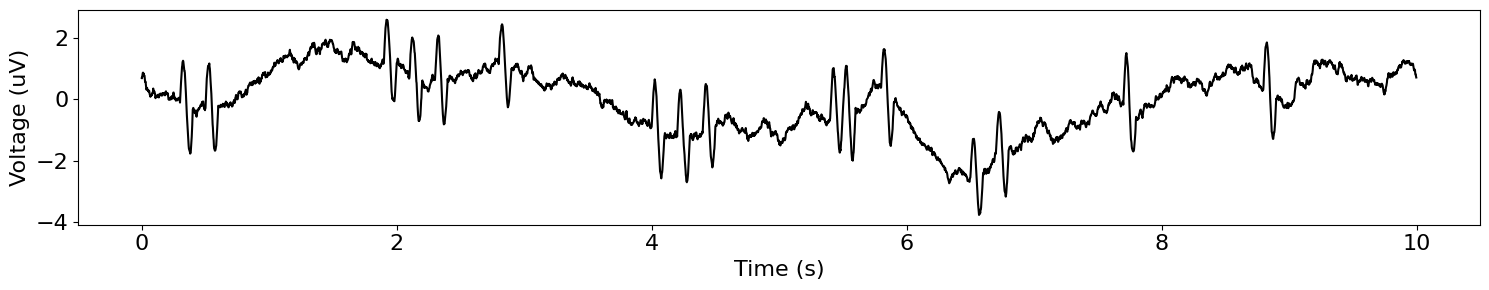

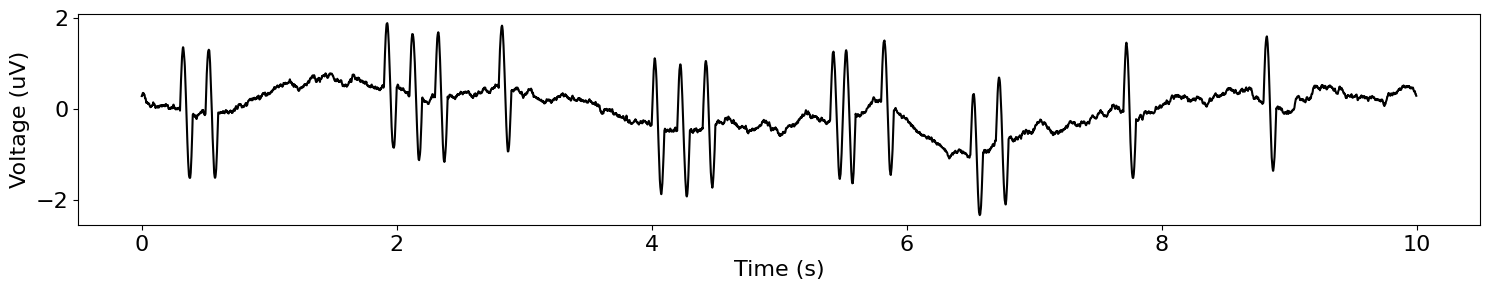

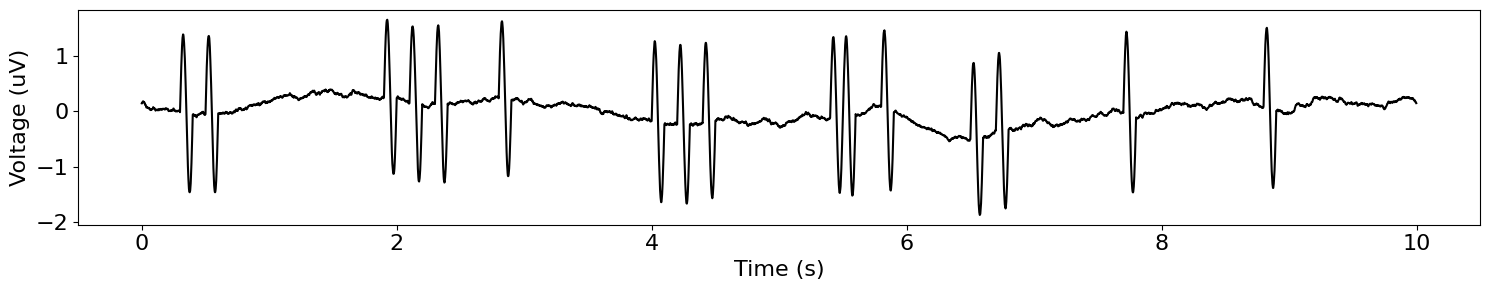

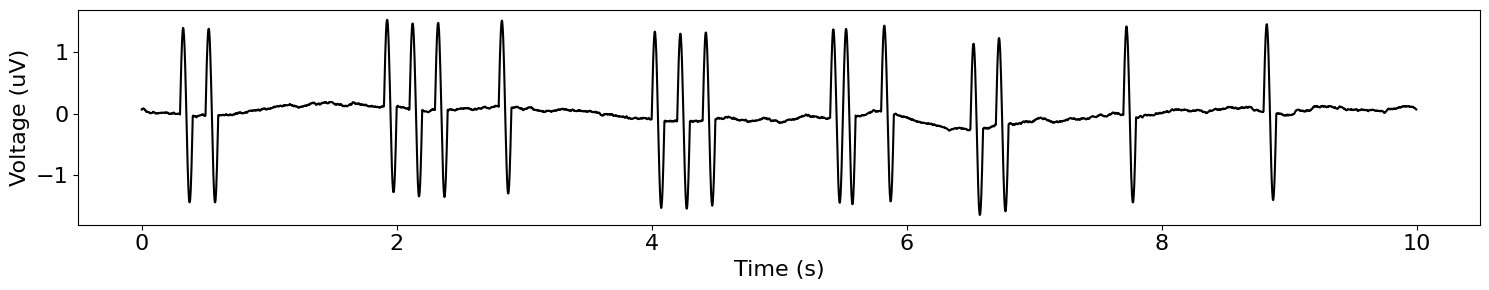

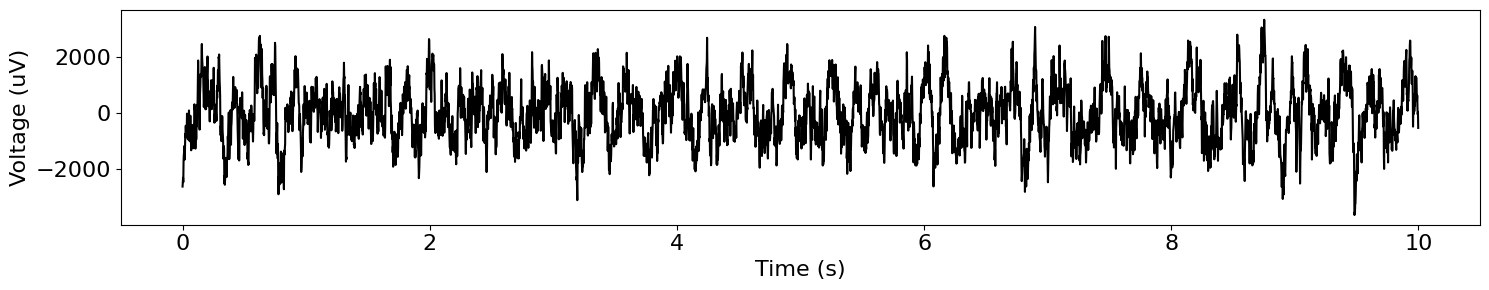

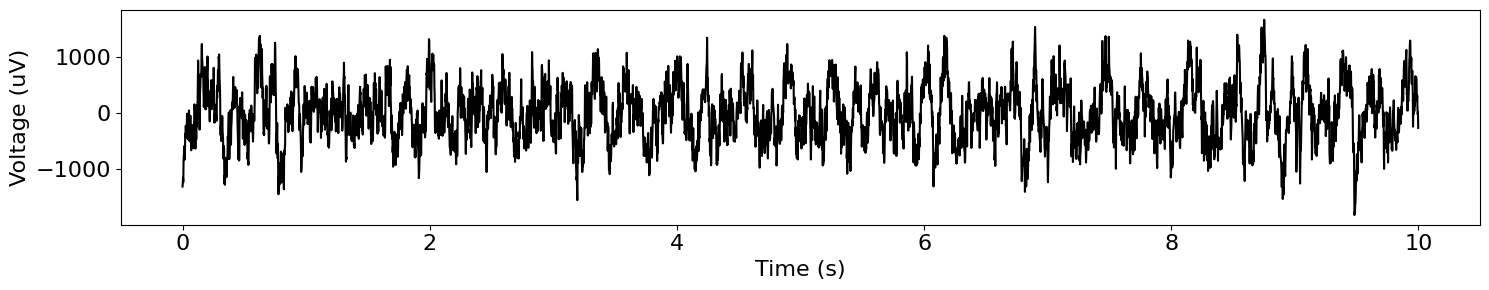

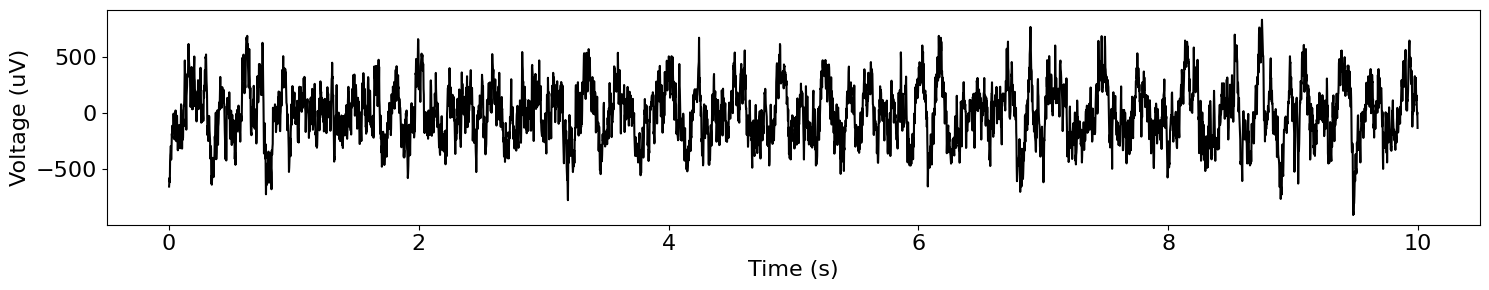

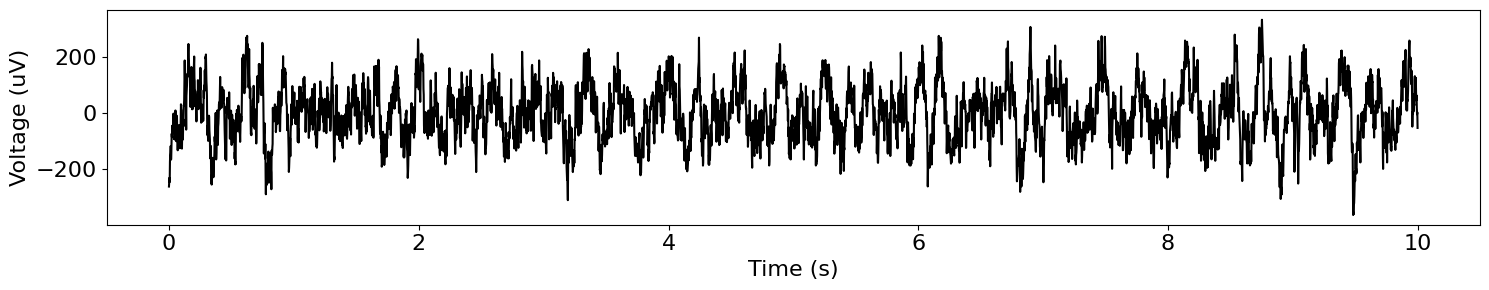

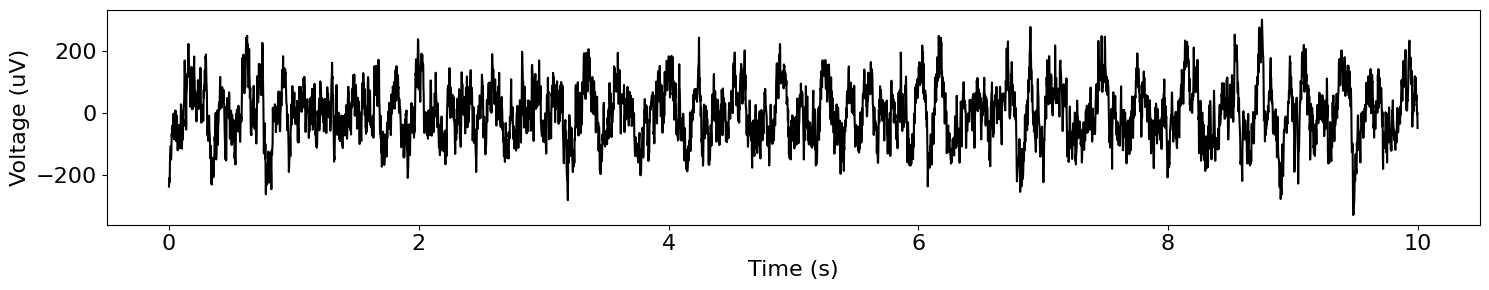

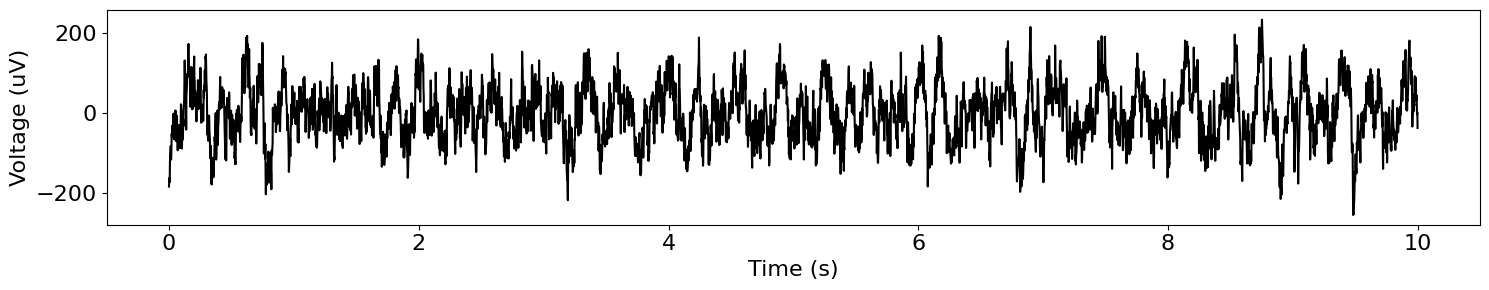

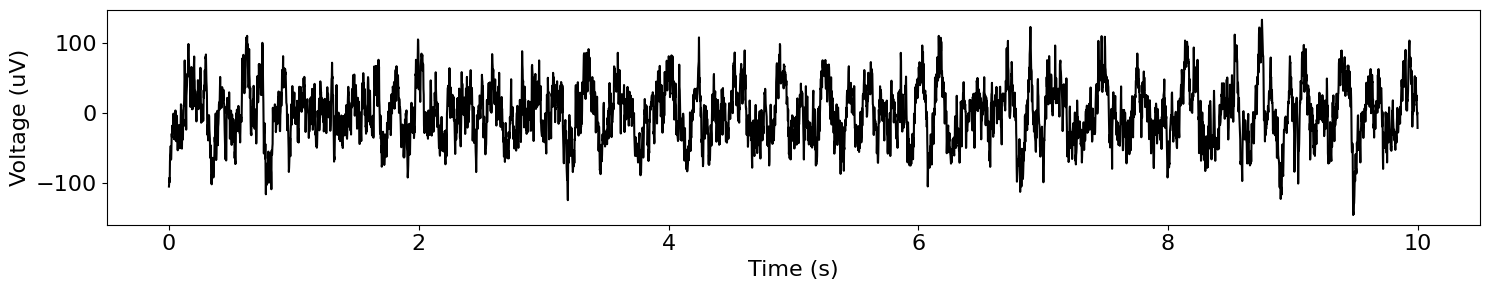

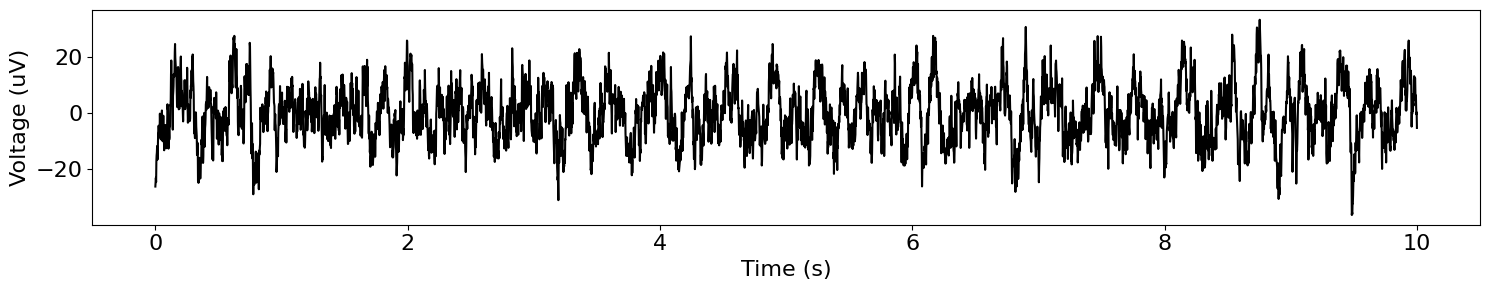

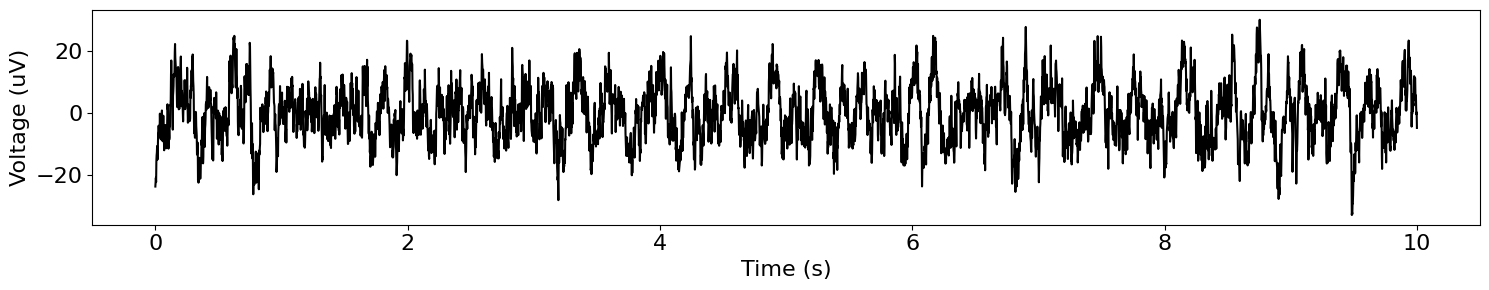

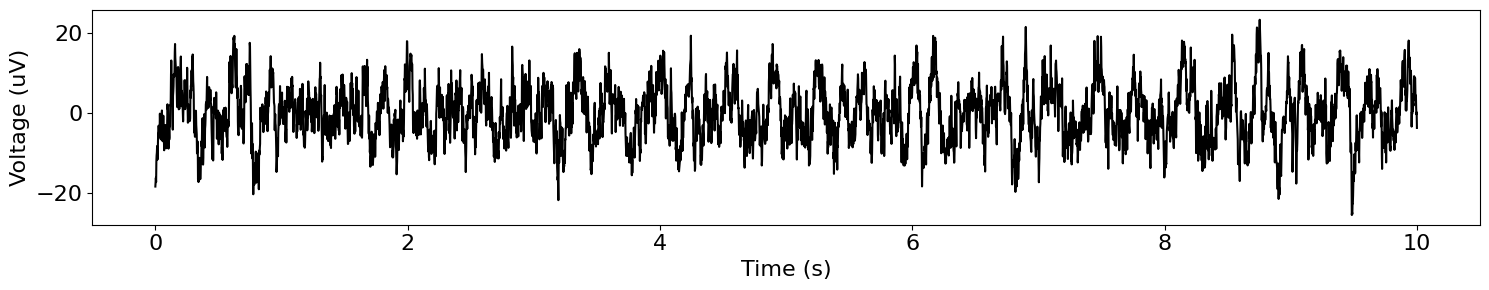

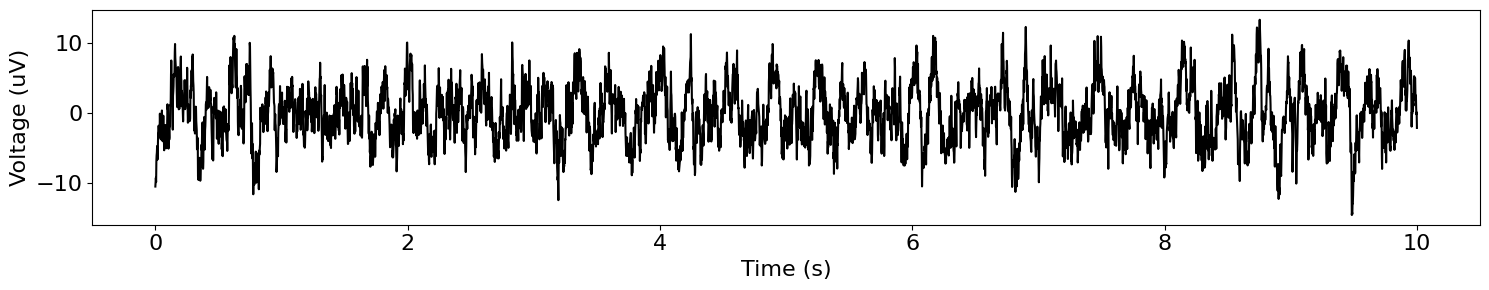

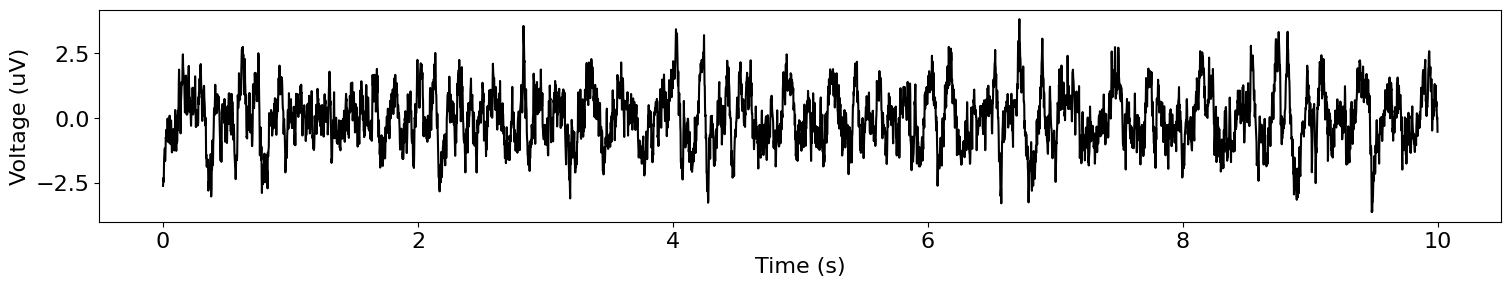

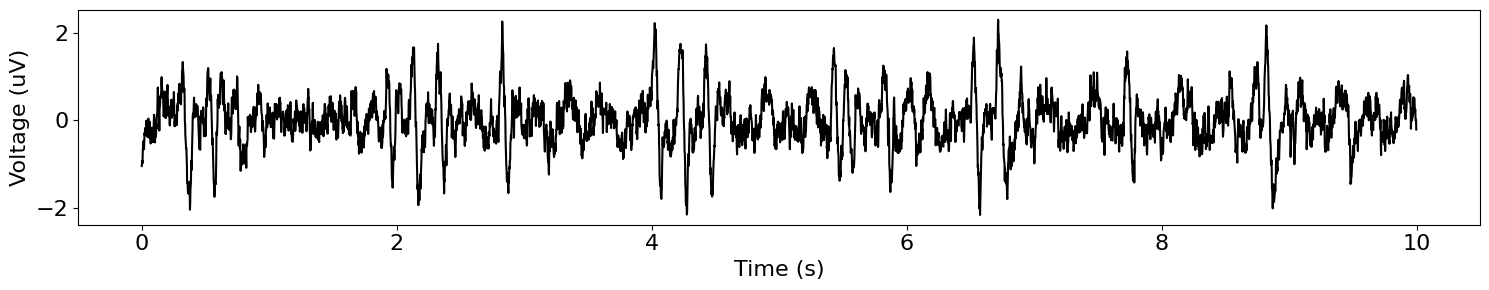

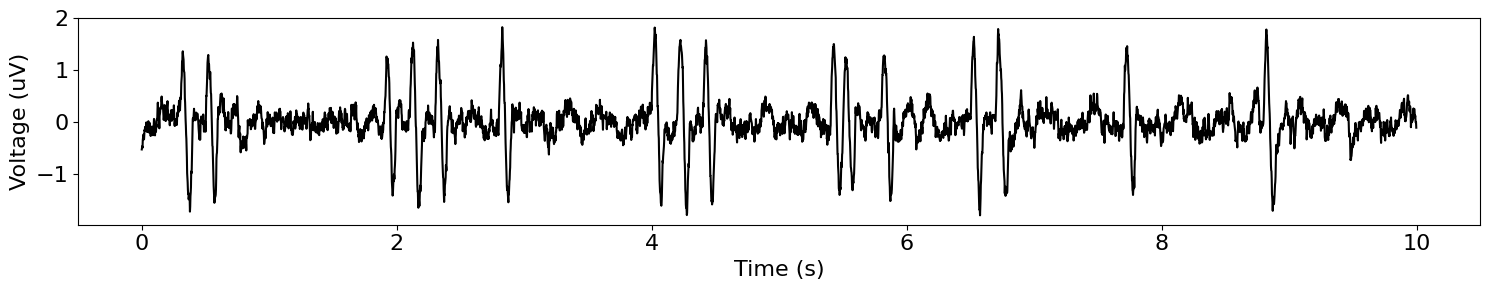

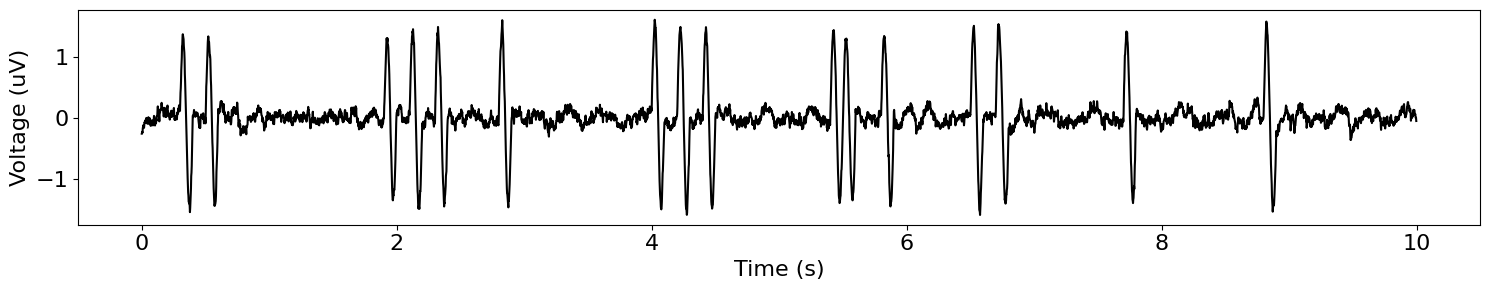

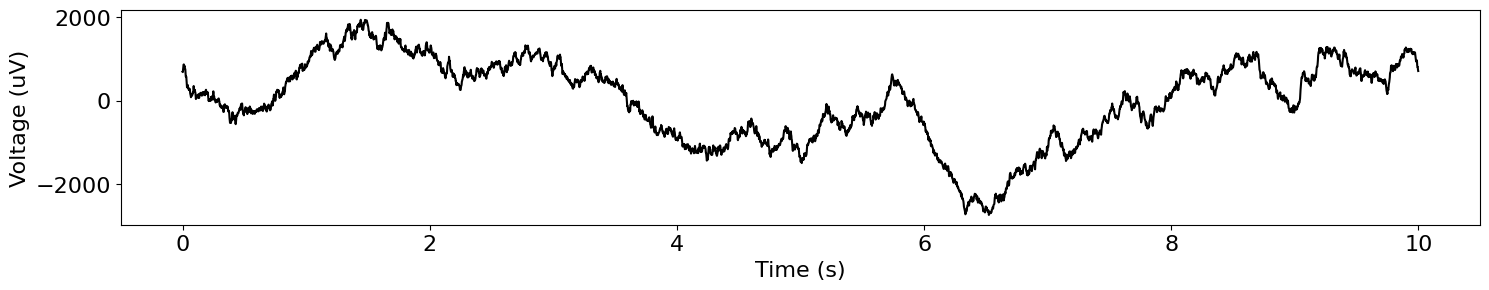

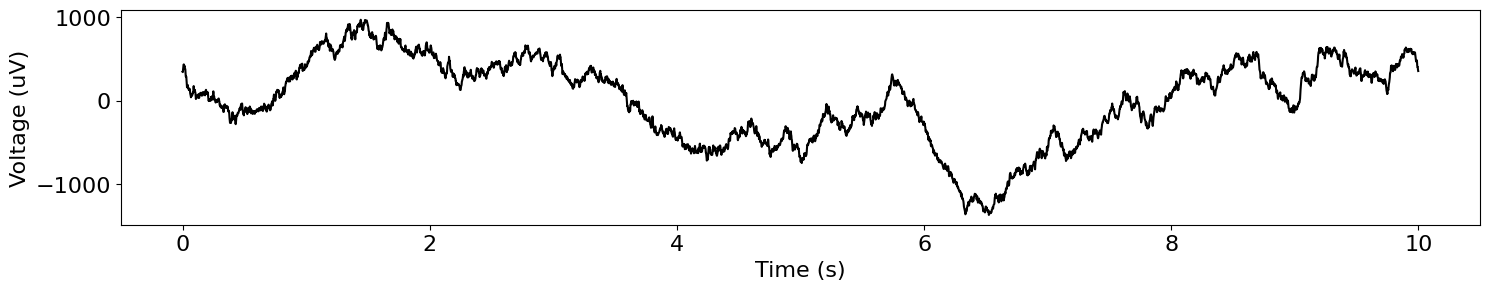

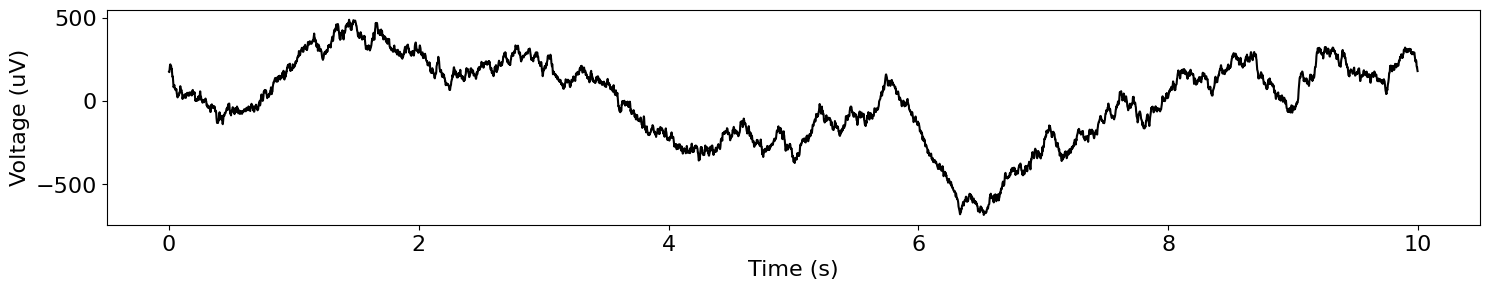

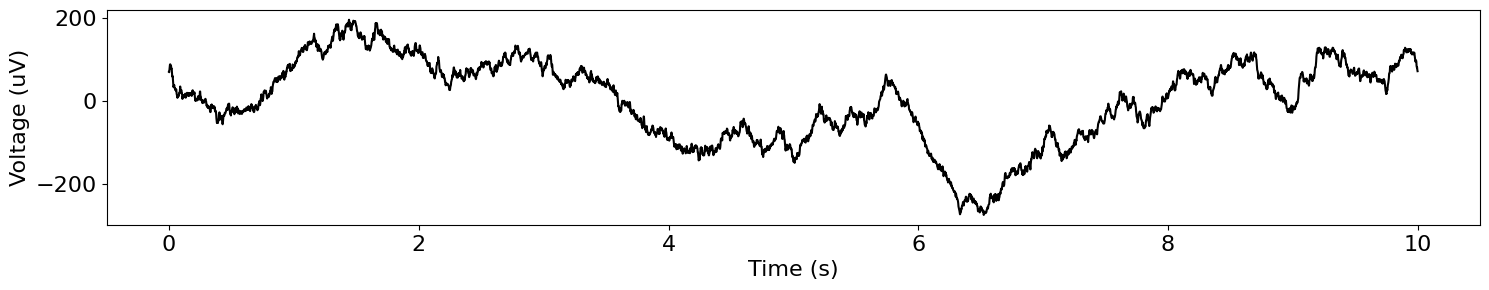

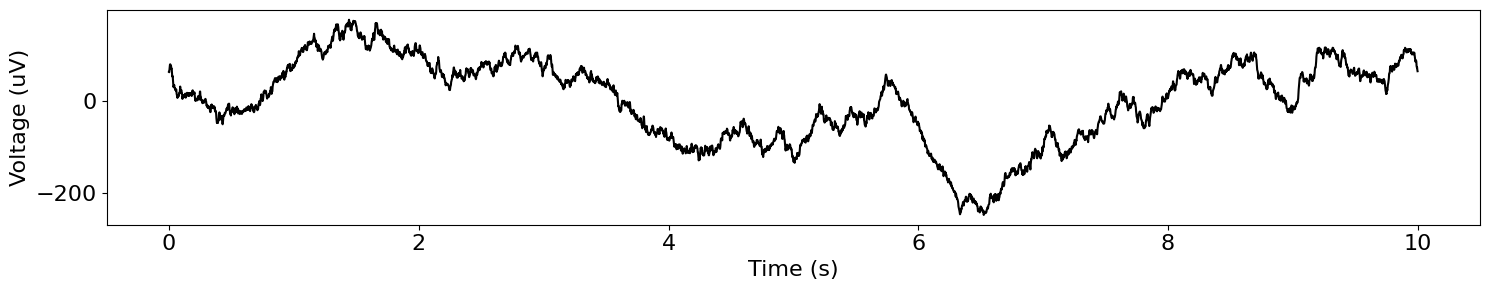

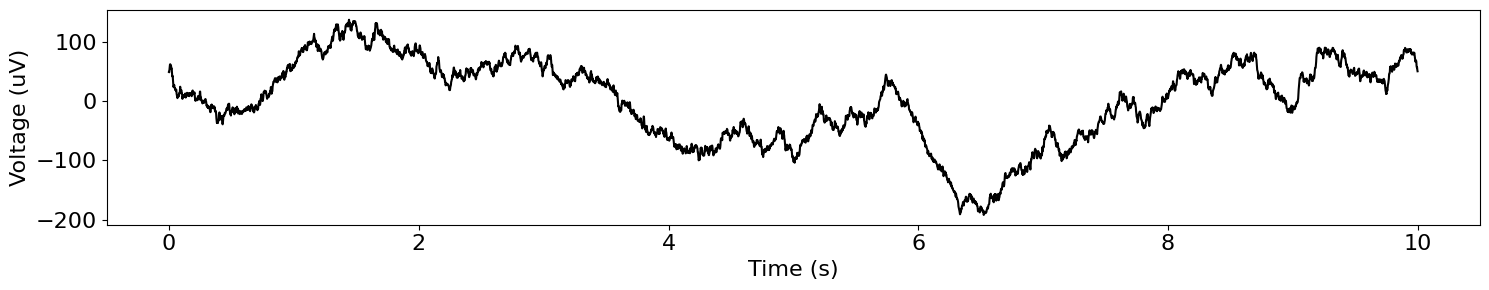

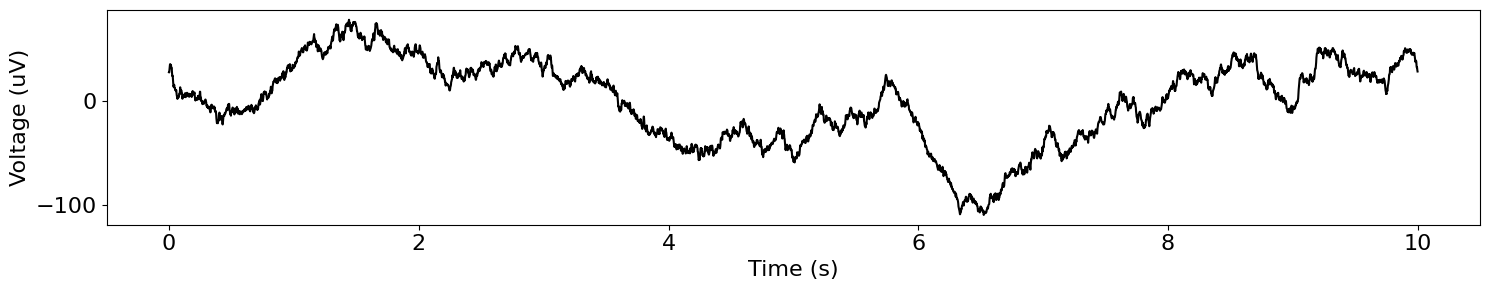

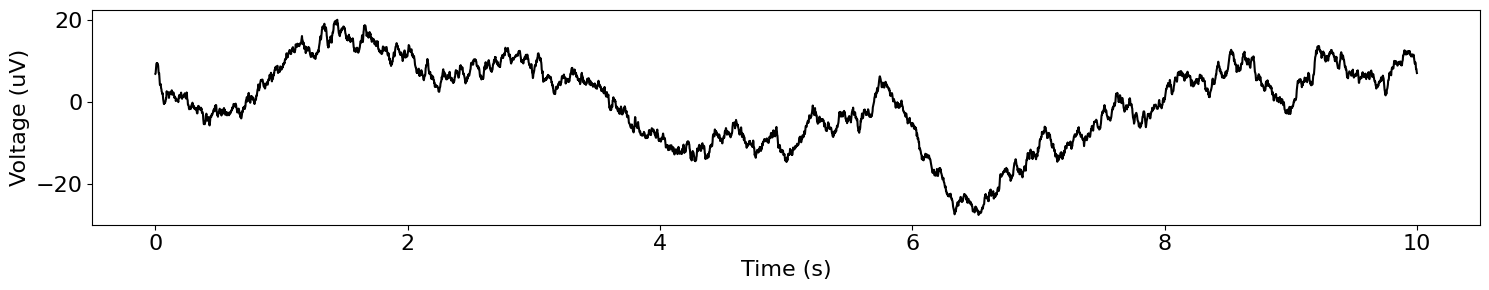

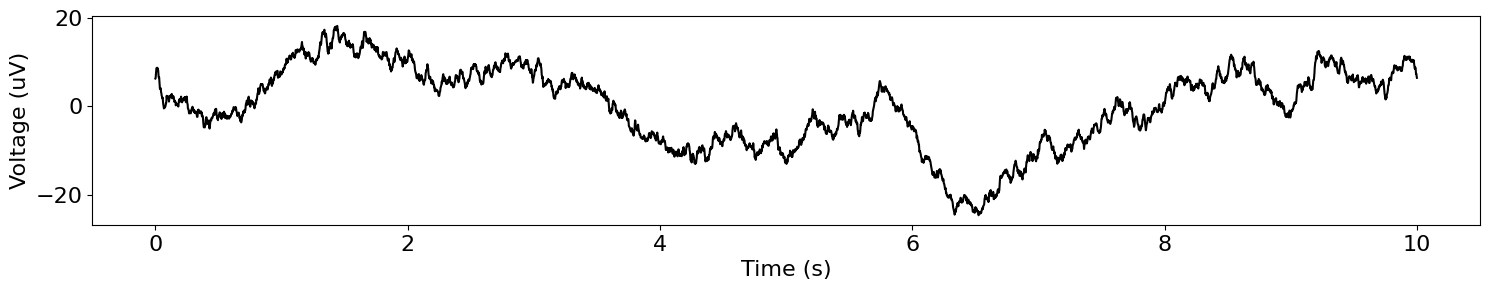

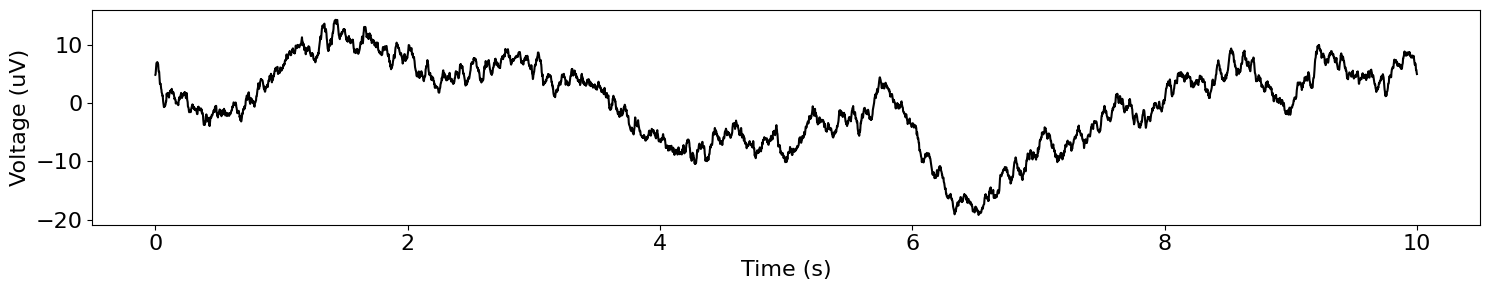

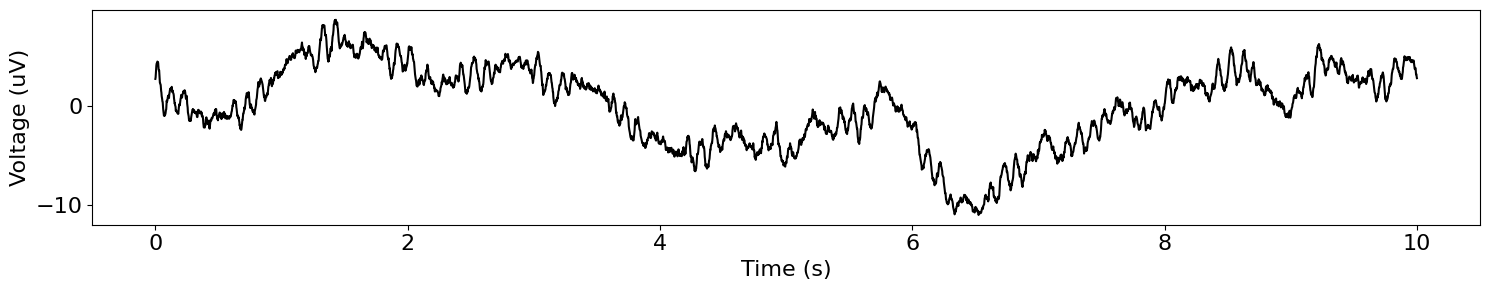

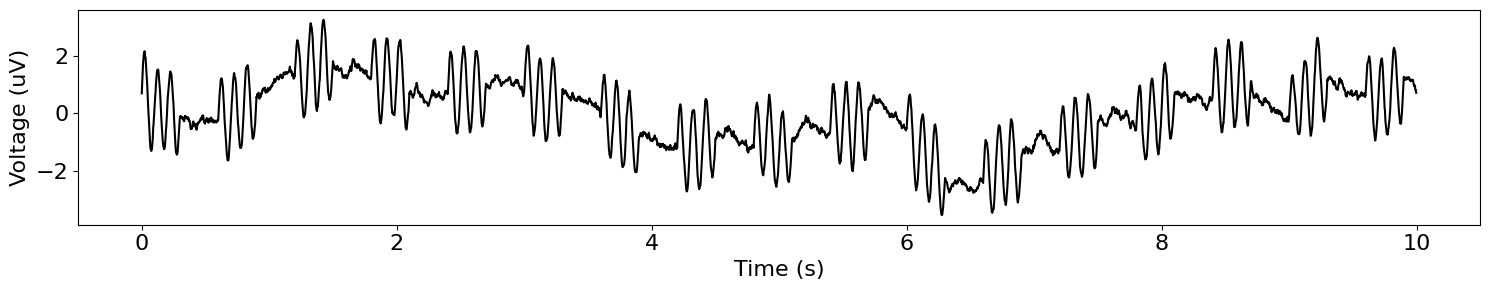

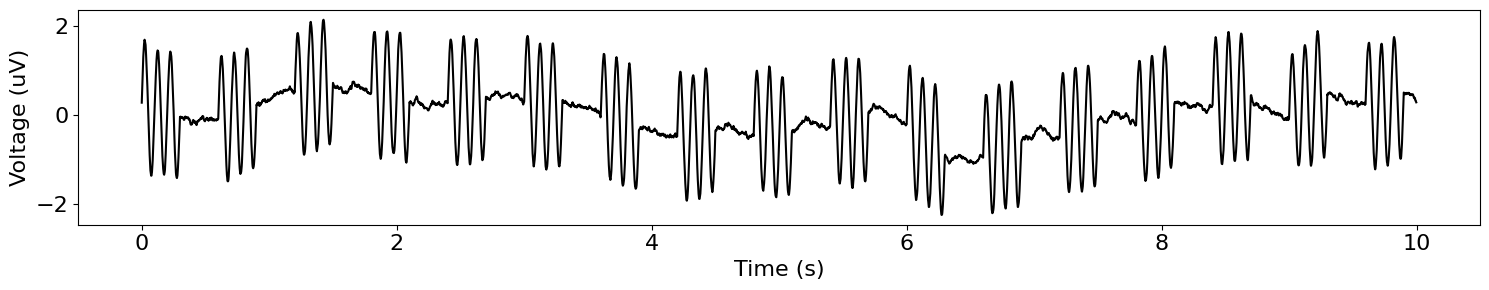

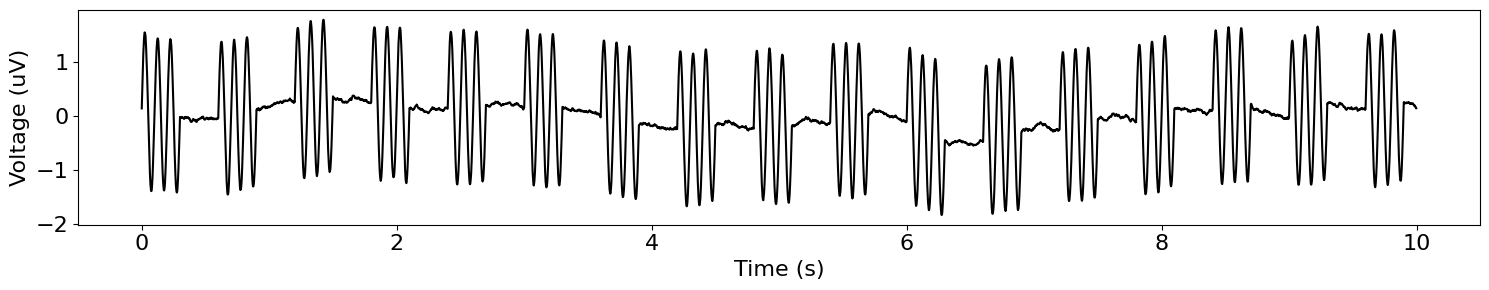

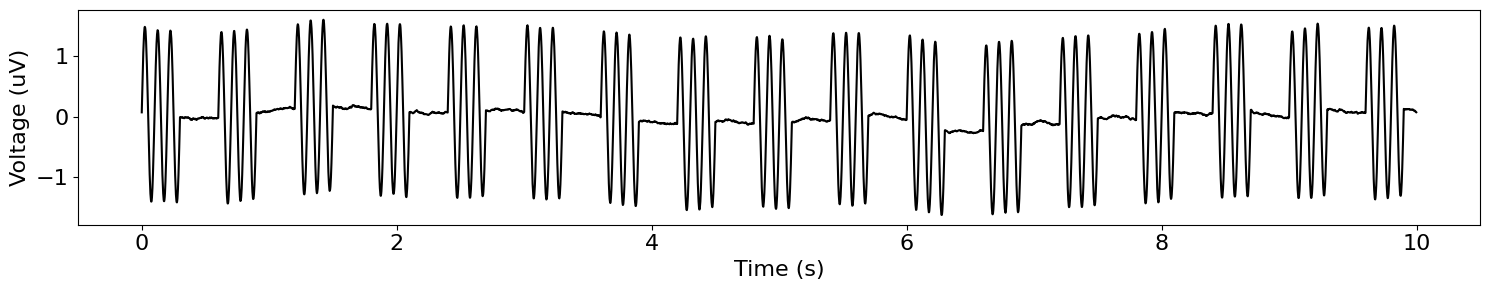

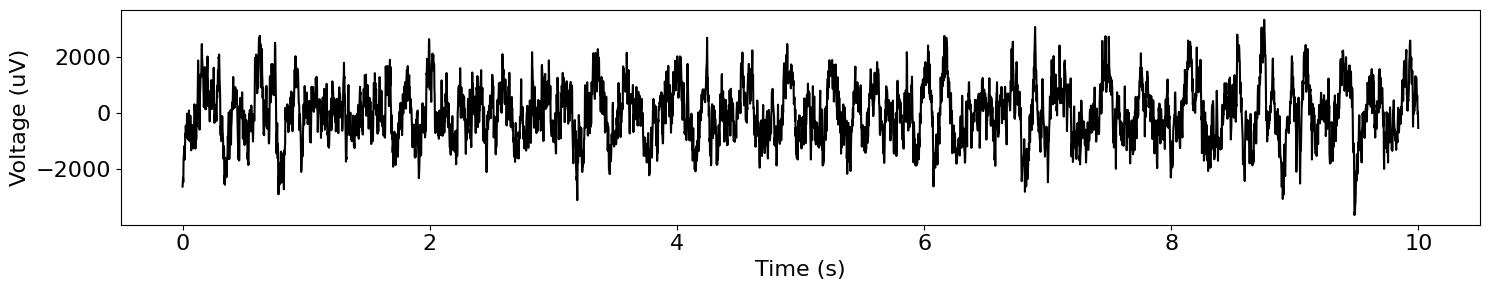

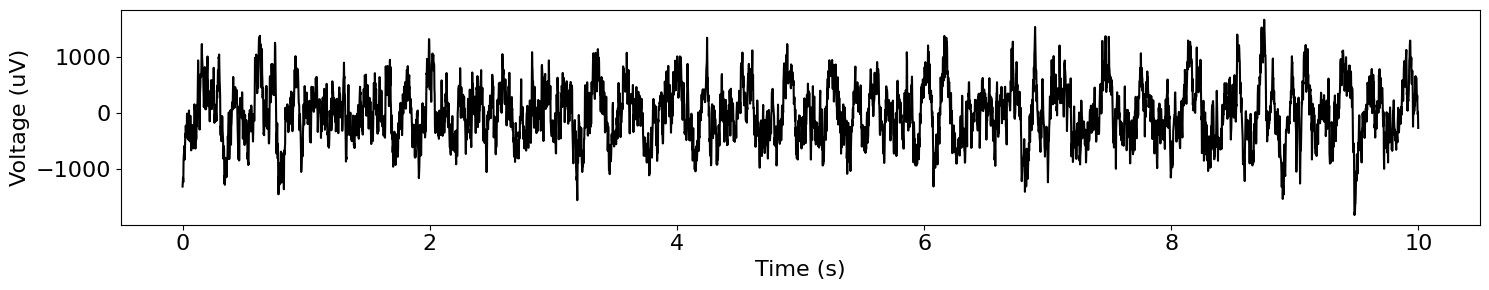

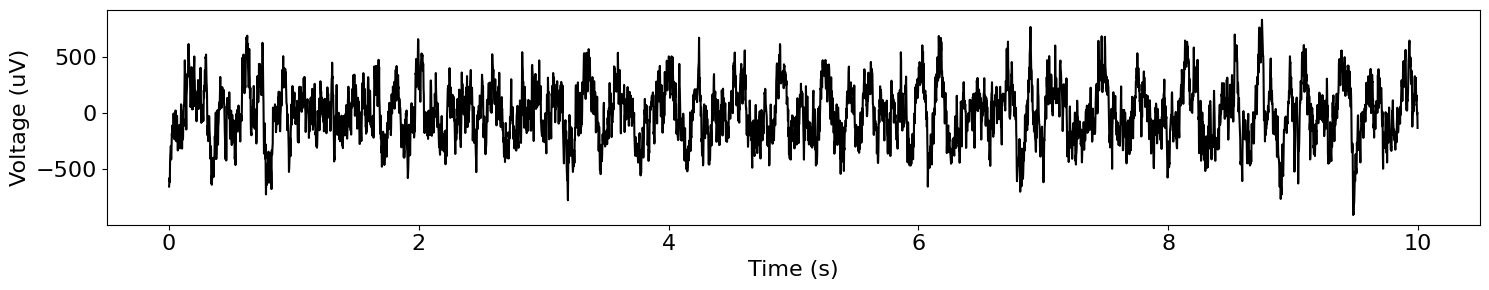

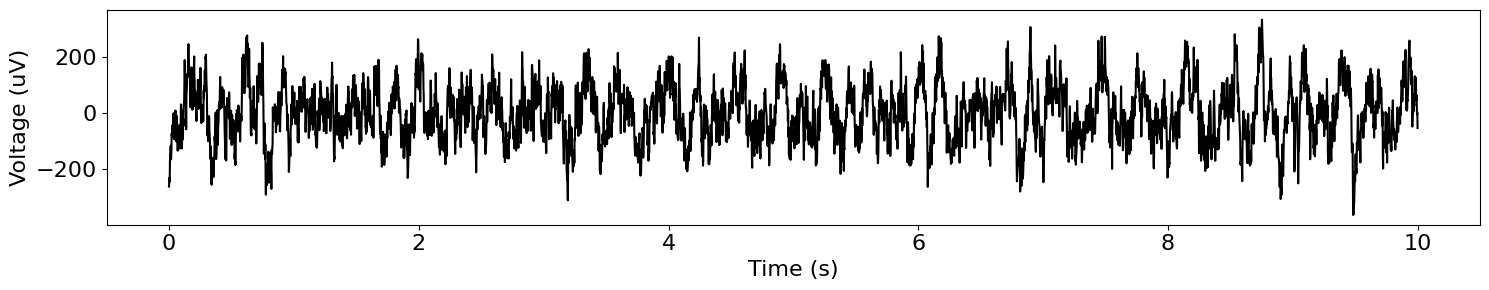

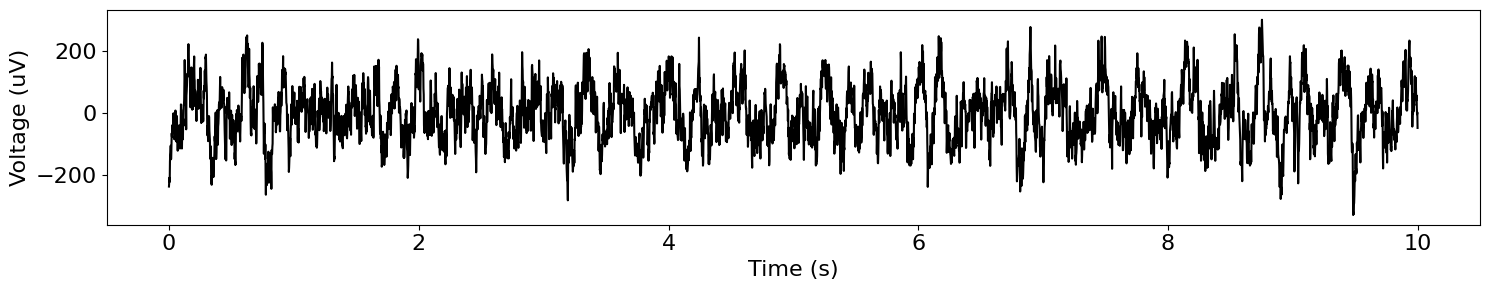

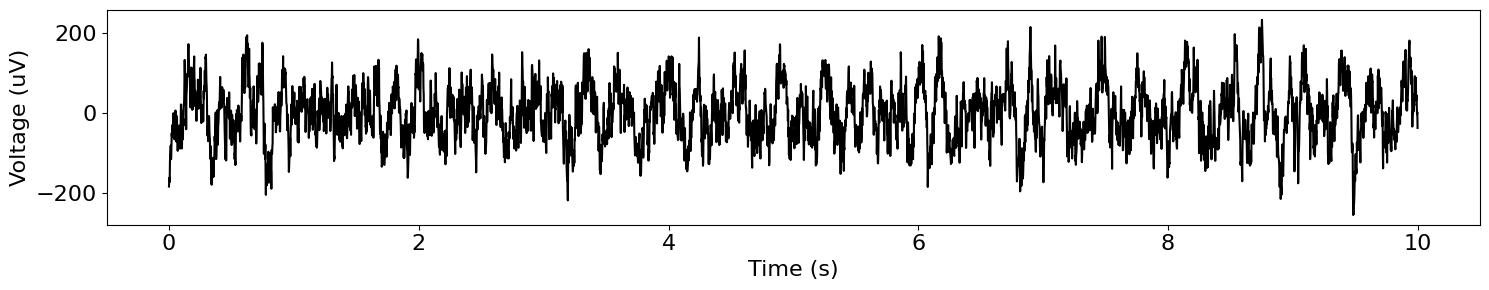

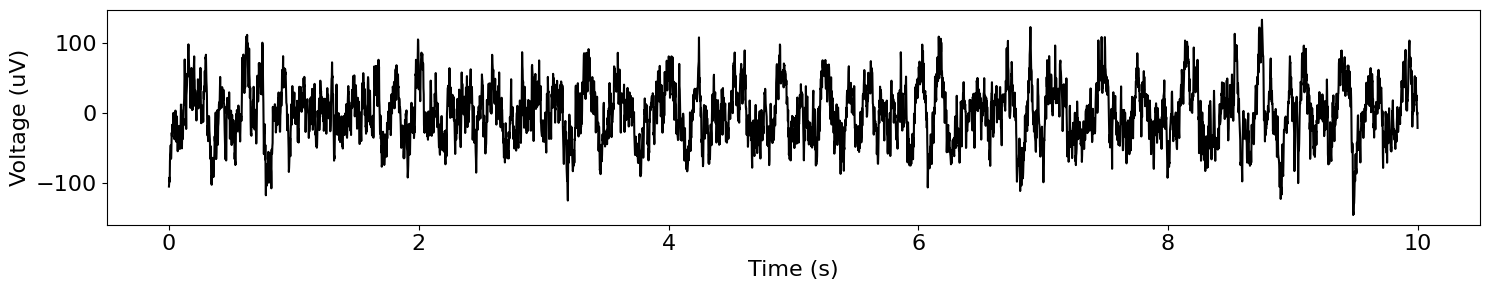

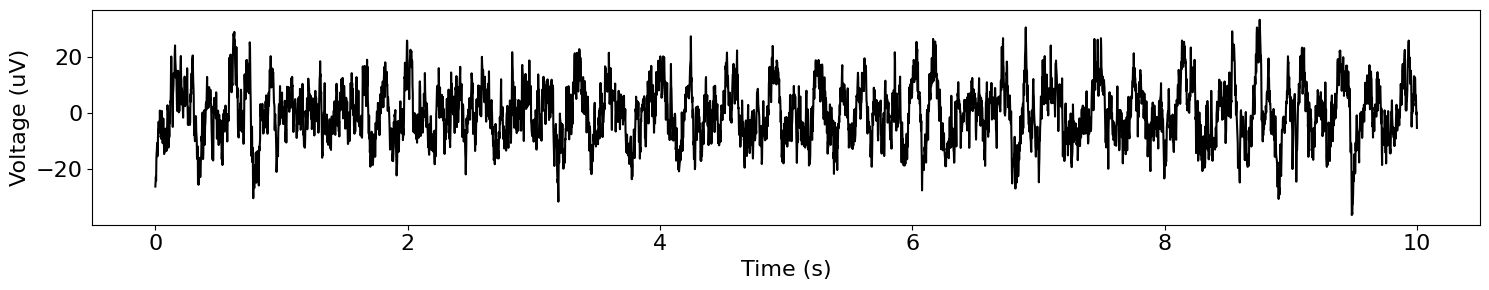

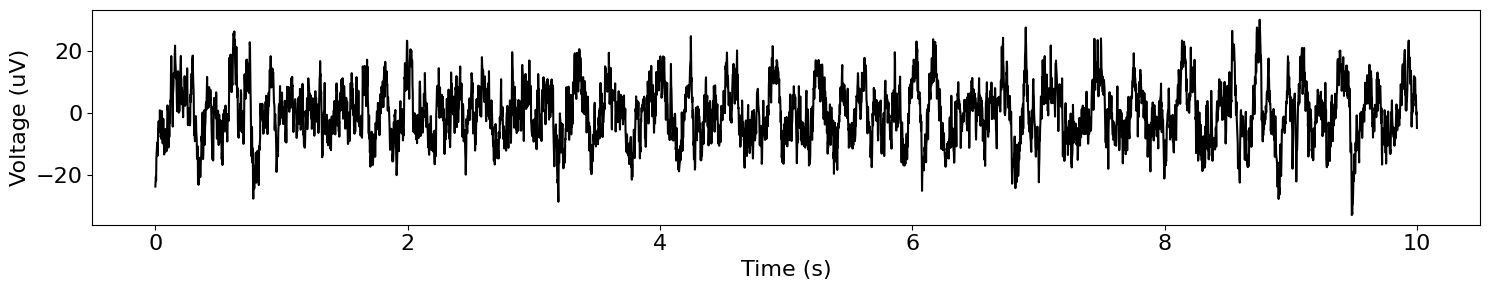

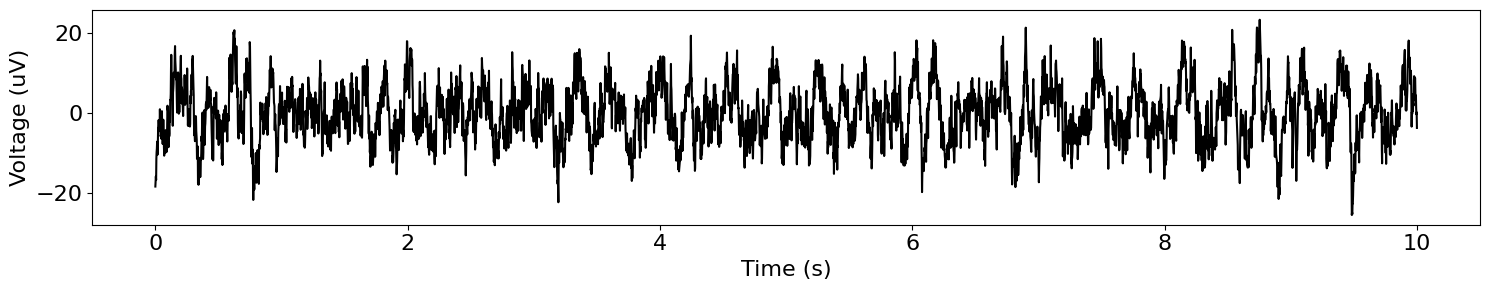

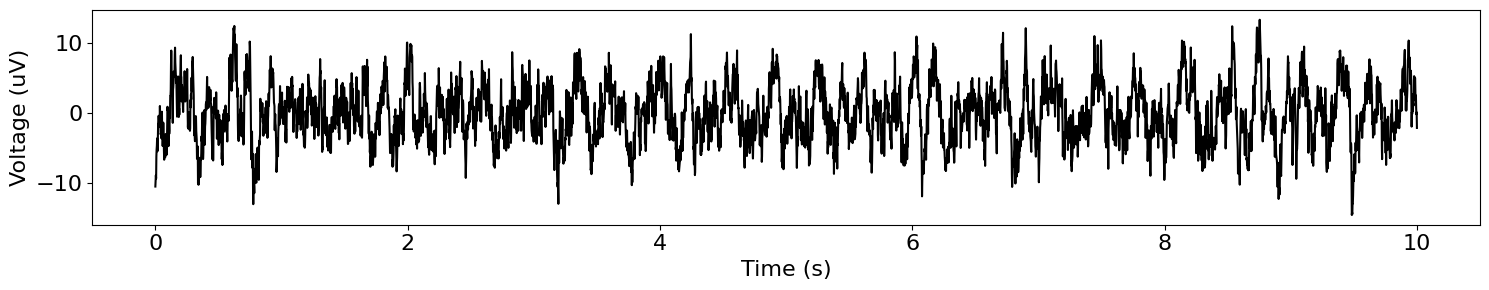

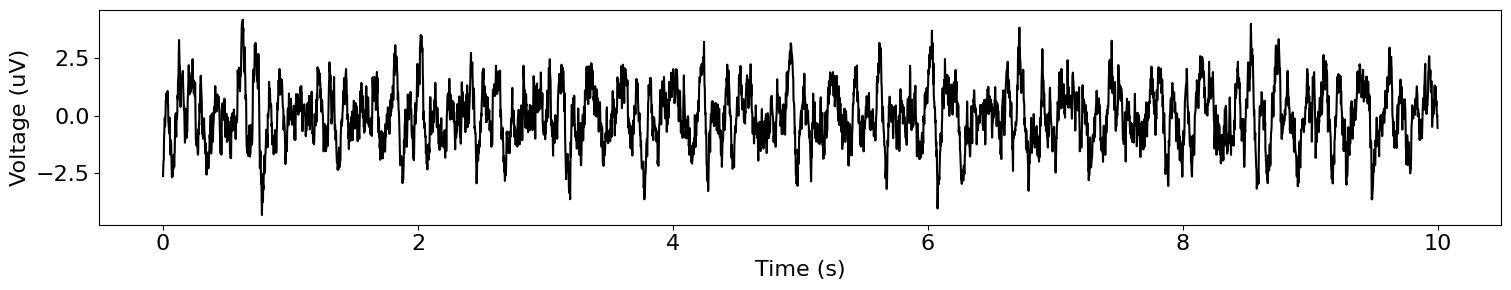

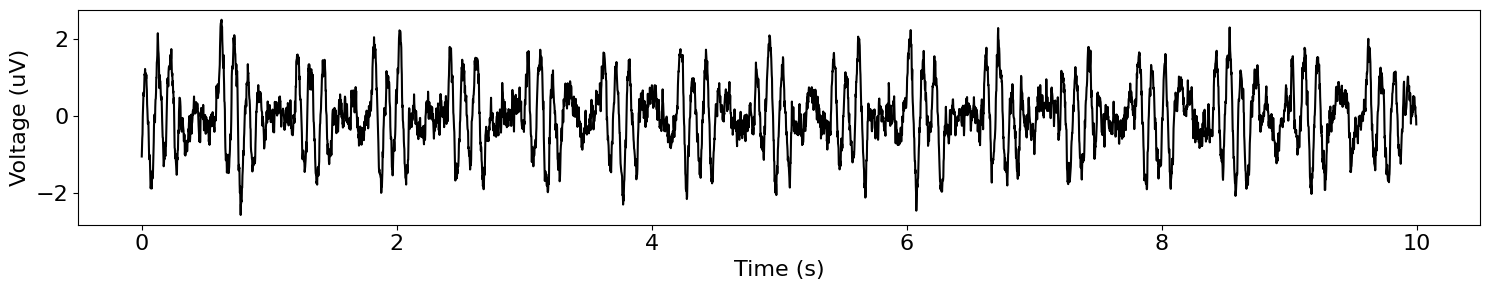

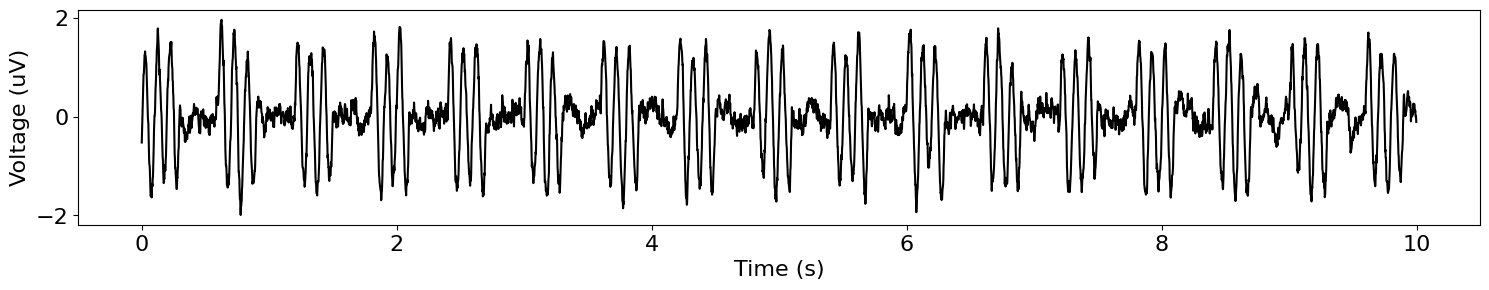

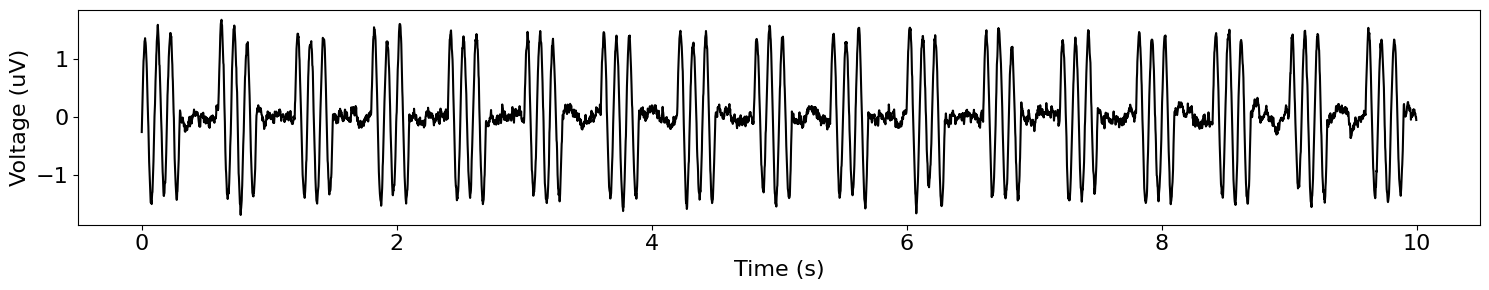

In [4]:
n_seconds = 10
fs = 500
times = create_times(n_seconds=n_seconds, fs=fs)

# bursts and signals taken from tutorial pages.
burst0 = sim_bursty_oscillation(n_seconds=n_seconds, fs=fs, freq=10, burst_def='durations', burst_params={
    'n_cycles_burst': 3, 'n_cycles_off': 3})
burst1 = sig = sim_bursty_oscillation(n_seconds=n_seconds, fs=fs, freq=10, burst_params={
    'enter_burst': 0.2, 'leave_burst': 0.8})
burst2 = sim_bursty_oscillation(n_seconds=n_seconds, fs=fs, freq=10, burst_def='durations',
                                burst_params={'n_cycles_burst': 3, 'n_cycles_off': 3})

sig0 = sim_powerlaw(n_seconds=n_seconds, fs=fs, exponent=-2.0)

sig1 = sim_powerlaw(n_seconds=n_seconds, fs=fs,
                    exponent=-1.5, f_range=(2, None))


bursts = [burst0, burst1, burst2]
sigs = [sig0, sig1]
ratios = [100.0, 50.0, 25.0, 10.0, 9.0, 7.0, 4.0, 1.0, 0.9, 0.7, 0.4, 0.1, 0.04, 0.02, 0.01]

combined_sigs = [None]*(len(bursts) * len(sigs)*len(ratios))

# for y_vals in all_to_plot:
#     plot_time_series(times=times, sigs=y_vals)
# tested, looks good.

for i in range(len(bursts)):
    for j in range(len(sigs)):
        for k in range(len(ratios)):
            combined_sigs[len(sigs)*len(ratios)*i + len(ratios)
                          * j+k] = bursts[i]+10*ratios[k]*sigs[j]


for y_vals in combined_sigs:
    plot_time_series(times=times, sigs=y_vals)

plt.show()